In [1]:
!python3 -m pip install mysqlclient --user
myvars = {}
with open("kjanagam-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501_Spring2024_Sec22490_group08_db')
cursor = conn.cursor()
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
cursor.execute('SELECT * FROM lap_data');
rows=cursor.fetchall()


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
df = pd.DataFrame(rows)

In [3]:
df

0   1   2    3                       4  5   6       7  8       9   \
0            0  57   1    1  0 days 00:02:23.141000  0   0  52.533  0  45.335   
1            1  88   2    1  0 days 00:02:24.016000  0   0  52.915  0  45.342   
2            2  50   2    1  0 days 00:02:25.278000  0   0  53.568  0  45.577   
3            3  70   2    1  0 days 00:02:25.548000  0   0  53.938  0  45.614   
4            4  61   2    1  0 days 00:02:25.859000  0   0  54.482  0  45.816   
...        ...  ..  ..  ...                     ... ..  ..     ... ..     ...   
503675  503675   7   3  378  0 days 00:03:32.801000  0   0  33.645  0  80.892   
503676  503676   8   2  379  0 days 00:03:32.310000  0   0  33.323  0  80.052   
503677  503677   7   3  379  0 days 00:03:33.348000  0   0   34.55  0  81.034   
503678  503678   8   2  380  0 days 00:03:36.142000  0   0  33.452  0  80.406   
503679  503679   7   3  380  0 days 00:03:35.207000  0   0  33.411  0  80.843   

        ...                                   38        39  40  41      42  \
0       ...            Krohn Racing #57 Stint #1    143141  20   1     349   
1       ...  Team Felbermayr-Proton #88 Stint #1    144016  21   2     875   
2       ...      Larbre Competition #50 Stint #1    145278  22   3    1262   
3       ...      Larbre Competition #70 Stint #1    145548  23   4     270   
4       ...        AF Corse-Waltrip #61 Stint #1    145859  24   5     311   
...     ...                                  ...       ...  ..  ..     ...   
503675  ...     Toyota Gazoo Racing #7 Stint #33  86220663   2   2  121119   
503676  ...     Toyota Gazoo Racing #8 Stint #32  86311854   1   1   91191   
503677  ...     Toyota Gazoo Racing #7 Stint #33  86434011   2   2  122157   
503678  ...     Toyota Gazoo Racing #8 Stint #32  86527996   1   1   93985   
503679  ...     Toyota Gazoo Racing #7 Stint #33  86649218   2   2  121222   

             43      44       45       46       47  
0         0.349  26.922    0.000    0.000  143.141  
1         0.875  27.797    0.875    0.875  144.016  
2         1.262  29.059    1.262    2.137  145.278  
3          0.27  29.329    0.270    2.407  145.548  
4         0.311  29.640    0.311    2.718  145.859  
...         ...     ...      ...      ...      ...  
503675  121.119  99.999  121.119  121.119  999.999  
503676   91.191  91.191    0.000    0.000  999.999  
503677  122.157  99.999  122.157  122.157  999.999  
503678   93.985  93.985    0.000    0.000  999.999  
503679  121.222  99.999  121.222  121.222  999.999  

[503680 rows x 48 columns]

In [4]:
columns = [
    "s.no", "number", "driver_number", "lap_number", "lap_time", "lap_improvement", "crossing_finish_line_in_pit", 
    "s1", "s1_improvement", "s2", "s2_improvement", "s3", "s3_improvement", "kph", "elapsed", "Hour", 
    "s1_large", "s2_large", "s3_large", "top_speed", "driver_name", "pit_time", "class", "Group1", 
    "Team", "manufacturer", "season", "circuit", "round", "vehicle", "flag_at_fl", "team_no", 
    "lap_time_ms", "lap_time_s", "engine", "driver_stint_no", "driver_stint", "team_stint_no", 
    "team_stint", "elapsed_ms", "position", "class_position", "interval_ms", "Interval1", "gap", 
    "class_interval", "class_gap", "elapsed_s"
]
df.columns = columns
print(df.columns)

Index(['s.no', 'number', 'driver_number', 'lap_number', 'lap_time',
       'lap_improvement', 'crossing_finish_line_in_pit', 's1',
       's1_improvement', 's2', 's2_improvement', 's3', 's3_improvement', 'kph',
       'elapsed', 'Hour', 's1_large', 's2_large', 's3_large', 'top_speed',
       'driver_name', 'pit_time', 'class', 'Group1', 'Team', 'manufacturer',
       'season', 'circuit', 'round', 'vehicle', 'flag_at_fl', 'team_no',
       'lap_time_ms', 'lap_time_s', 'engine', 'driver_stint_no',
       'driver_stint', 'team_stint_no', 'team_stint', 'elapsed_ms', 'position',
       'class_position', 'interval_ms', 'Interval1', 'gap', 'class_interval',
       'class_gap', 'elapsed_s'],
      dtype='object')


In [5]:
columns_to_drop = ['class_interval','Group1','team_stint_no','elapsed_s','elapsed','s1_large','s2_large','s3_large','class_position','flag_at_fl',
                   'interval_ms', 'Interval1', 'driver_stint_no', 'team_no', 'crossing_finish_line_in_pit','driver_number','class_gap',
                   'gap','driver_stint','team_stint','lap_time_ms','lap_time_s','elapsed_ms','Hour']
df = df.drop(columns=columns_to_drop)

In [6]:
print("Columns in the DataFrame:")
for col in df.columns:
    print(col)


Columns in the DataFrame:
s.no
number
lap_number
lap_time
lap_improvement
s1
s1_improvement
s2
s2_improvement
s3
s3_improvement
kph
top_speed
driver_name
pit_time
class
Team
manufacturer
season
circuit
round
vehicle
engine
position


In [7]:
import pandas as pd
def convert_to_seconds(time_str):
    try:
        components = time_str.split()[2].split(':')
        hours = int(components[0])
        minutes = int(components[1])
        seconds = int(components[2].split('.')[0])
        microseconds = int(components[2].split('.')[1])
        total_seconds = hours * 3600 + minutes * 60 + seconds + microseconds / 1e6
        return total_seconds
    except:
        return None
df['lap_time'] = df['lap_time'].apply(convert_to_seconds)
print(df)

          s.no  number  lap_number  lap_time lap_improvement      s1  \
0            0      57           1   143.141               0  52.533   
1            1      88           1   144.016               0  52.915   
2            2      50           1   145.278               0  53.568   
3            3      70           1   145.548               0  53.938   
4            4      61           1   145.859               0  54.482   
...        ...     ...         ...       ...             ...     ...   
503675  503675       7         378   212.801               0  33.645   
503676  503676       8         379   212.310               0  33.323   
503677  503677       7         379   213.348               0   34.55   
503678  503678       8         380   216.142               0  33.452   
503679  503679       7         380   215.207               0  33.411   

       s1_improvement      s2 s2_improvement       s3  ... pit_time     class  \
0                   0  45.335              0   45.273 

### Outliers Detection and Handling

In [8]:
import pandas as pd
def find_outliers(df):
    outliers_count = {}  
    non_numeric_columns = []
    
    for column in df.select_dtypes(include='number').columns:
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_count[column] = outliers.shape[0]

    non_numeric_columns = df.select_dtypes(exclude='number').columns.tolist() 
    return outliers_count, non_numeric_columns
outliers_count, non_numeric_columns = find_outliers(df)
for column, count in outliers_count.items():
    print(f"Column '{column}' has {count} outliers.")
print("Columns containing non-numeric data:", non_numeric_columns)

Column 's.no' has 0 outliers.
Column 'number' has 4285 outliers.
Column 'lap_number' has 4944 outliers.
Column 'lap_time' has 8948 outliers.
Column 'kph' has 9863 outliers.
Column 'top_speed' has 30586 outliers.
Column 'pit_time' has 28644 outliers.
Column 'round' has 0 outliers.
Column 'position' has 6412 outliers.
Columns containing non-numeric data: ['lap_improvement', 's1', 's1_improvement', 's2', 's2_improvement', 's3', 's3_improvement', 'driver_name', 'class', 'Team', 'manufacturer', 'season', 'circuit', 'vehicle', 'engine']


In [9]:
import pandas as pd
non_convertible_columns = ['driver_name','lap_time', 'class', 'Group1', 'Team', 'manufacturer', 'season', 
                           'circuit', 'vehicle', 'engine', 'driver_stint', 'team_stint']
convertible_columns = [col for col in df.columns if col not in non_convertible_columns]
df[convertible_columns] = df[convertible_columns].apply(pd.to_numeric, errors='coerce')

In [10]:
import pandas as pd
def find_outliers(df):
    outliers_count = {}  
    non_numeric_columns = []
    
    for column in df.select_dtypes(include='number').columns:
        
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_count[column] = outliers.shape[0]

    non_numeric_columns = df.select_dtypes(exclude='number').columns.tolist() 
    return outliers_count, non_numeric_columns
outliers_count, non_numeric_columns = find_outliers(df)
for column, count in outliers_count.items():
    print(f"Column '{column}' has {count} outliers.")
print("Columns containing non-numeric data:", non_numeric_columns)

Column 's.no' has 0 outliers.
Column 'number' has 4285 outliers.
Column 'lap_number' has 4944 outliers.
Column 'lap_time' has 8948 outliers.
Column 'lap_improvement' has 2500 outliers.
Column 's1' has 118019 outliers.
Column 's1_improvement' has 6925 outliers.
Column 's2' has 10818 outliers.
Column 's2_improvement' has 6935 outliers.
Column 's3' has 2829 outliers.
Column 's3_improvement' has 6937 outliers.
Column 'kph' has 9863 outliers.
Column 'top_speed' has 30586 outliers.
Column 'pit_time' has 28644 outliers.
Column 'round' has 0 outliers.
Column 'position' has 6412 outliers.
Columns containing non-numeric data: ['driver_name', 'class', 'Team', 'manufacturer', 'season', 'circuit', 'vehicle', 'engine']


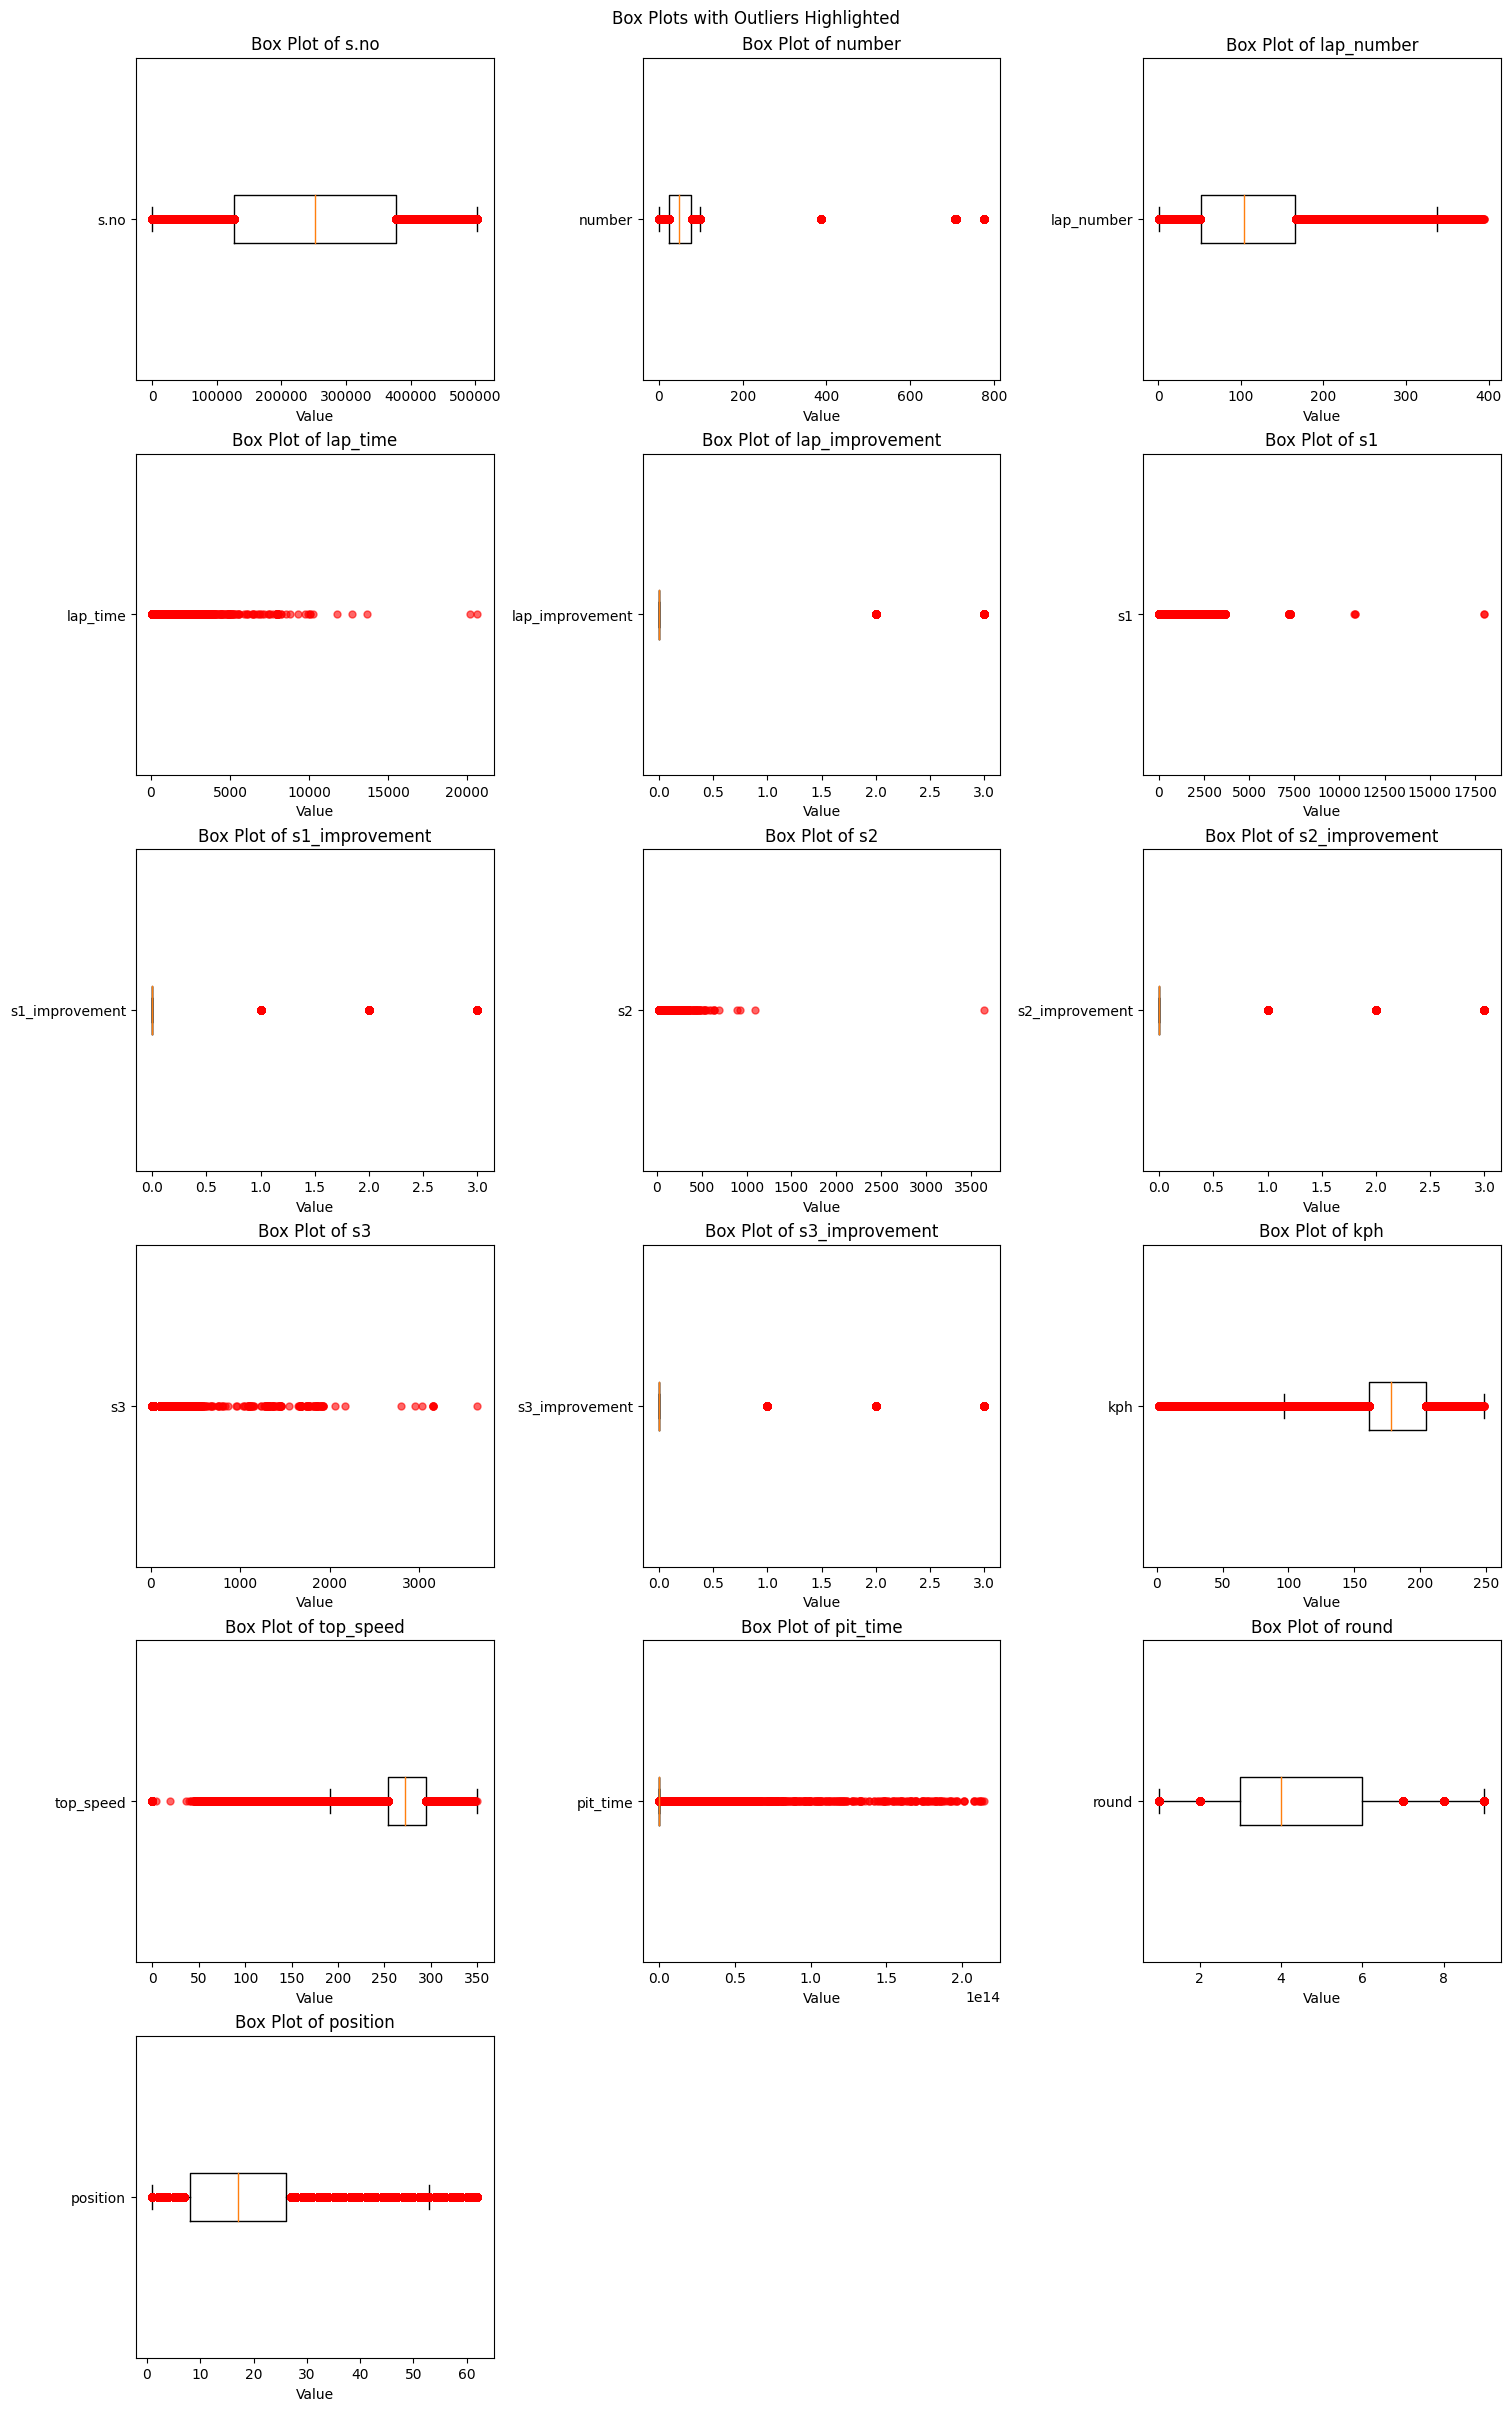

In [11]:
import matplotlib.pyplot as plt


numeric_columns = df.select_dtypes(include='number').columns
n_cols = 3 
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)
fig.suptitle('Box Plots with Outliers Highlighted')

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    axes[i].boxplot(df[column], vert=False, showfliers=False)
    outliers = df[~df[column].between(df[column].quantile(0.25), df[column].quantile(0.75))]
    if not outliers.empty:
        axes[i].plot(outliers[column], [1] * len(outliers), 'ro', markersize=5, alpha=0.6)  
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_yticks([1])
    axes[i].set_yticklabels([column]) 

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

In [12]:
import pandas as pd

def drop_outliers(df):
    for column in df.select_dtypes(include='number').columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]
    
    return df
df = drop_outliers(df)

In [13]:
df

s.no  number  lap_number  lap_time  lap_improvement      s1  \
11          11       2           1   116.219                0  37.529   
12          12       1           1   117.002                0  36.575   
13          13       3           1   117.317                0  38.591   
14          14      12           1   119.921                0  39.588   
15          15      21           1   120.254                0  39.886   
...        ...     ...         ...       ...              ...     ...   
502781  502781       3         337   225.303                0  34.295   
502782  502782      41         337   213.905                0  33.940   
502783  502783      83         337   215.082                0  34.124   
502785  502785      44         337   213.586                0  33.731   
502786  502786      39         337   217.487                0  33.950   

        s1_improvement      s2  s2_improvement       s3  ...  pit_time  class  \
11                   0  38.945               0   39.745  ...         0   LMP1   
12                   0  38.786               0   41.641  ...         0   LMP1   
13                   0  39.306               0   39.420  ...         0   LMP1   
14                   0  40.339               0   39.994  ...         0   LMP1   
15                   0  40.363               0   40.005  ...         0   LMP1   
...                ...     ...             ...      ...  ...       ...    ...   
502781               0  83.487               0  107.521  ...         0   LMP2   
502782               0  82.578               0   97.387  ...         0   LMP2   
502783               0  82.603               0   98.355  ...         0   LMP2   
502785               0  82.370               0   97.485  ...         0   LMP2   
502786               0  82.843               0  100.694  ...         0   LMP2   

                         Team manufacturer  season  circuit round  \
11      Audi Sport Team Joest         Audi    2012  SEBRING     1   
12      Audi Sport Team Joest         Audi    2012  SEBRING     1   
13      Audi Sport Team Joest         Audi    2012  SEBRING     1   
14           Rebellion Racing         Lola    2012  SEBRING     1   
15             Strakka Racing  HPD (Honda)    2012  SEBRING     1   
...                       ...          ...     ...      ...   ...   
502781        DKR Engineering        Oreca    2022  LE MANS     3   
502782        Realteam by WRT        Oreca    2022  LE MANS     3   
502783               AF Corse        Oreca    2022  LE MANS     3   
502785         ARC Bratislava        Oreca    2022  LE MANS     3   
502786           Graff Racing        Oreca    2022  LE MANS     3   

                        vehicle  engine position  
11      Audi R18 e-tron quattro    Audi        1  
12      Audi R18 e-tron quattro    Audi        2  
13               Audi R18 Ultra    Audi        3  
14            Lola B12/60 Coupe  Toyota        4  
15                 HPD ARX  03a   Honda        5  
...                         ...     ...      ...  
502781                 Oreca 07  Gibson       22  
502782                 Oreca 07  Gibson       23  
502783                 Oreca 07  Gibson       24  
502785                 Oreca 07  Gibson       27  
502786                 Oreca 07  Gibson       33  

[346010 rows x 24 columns]

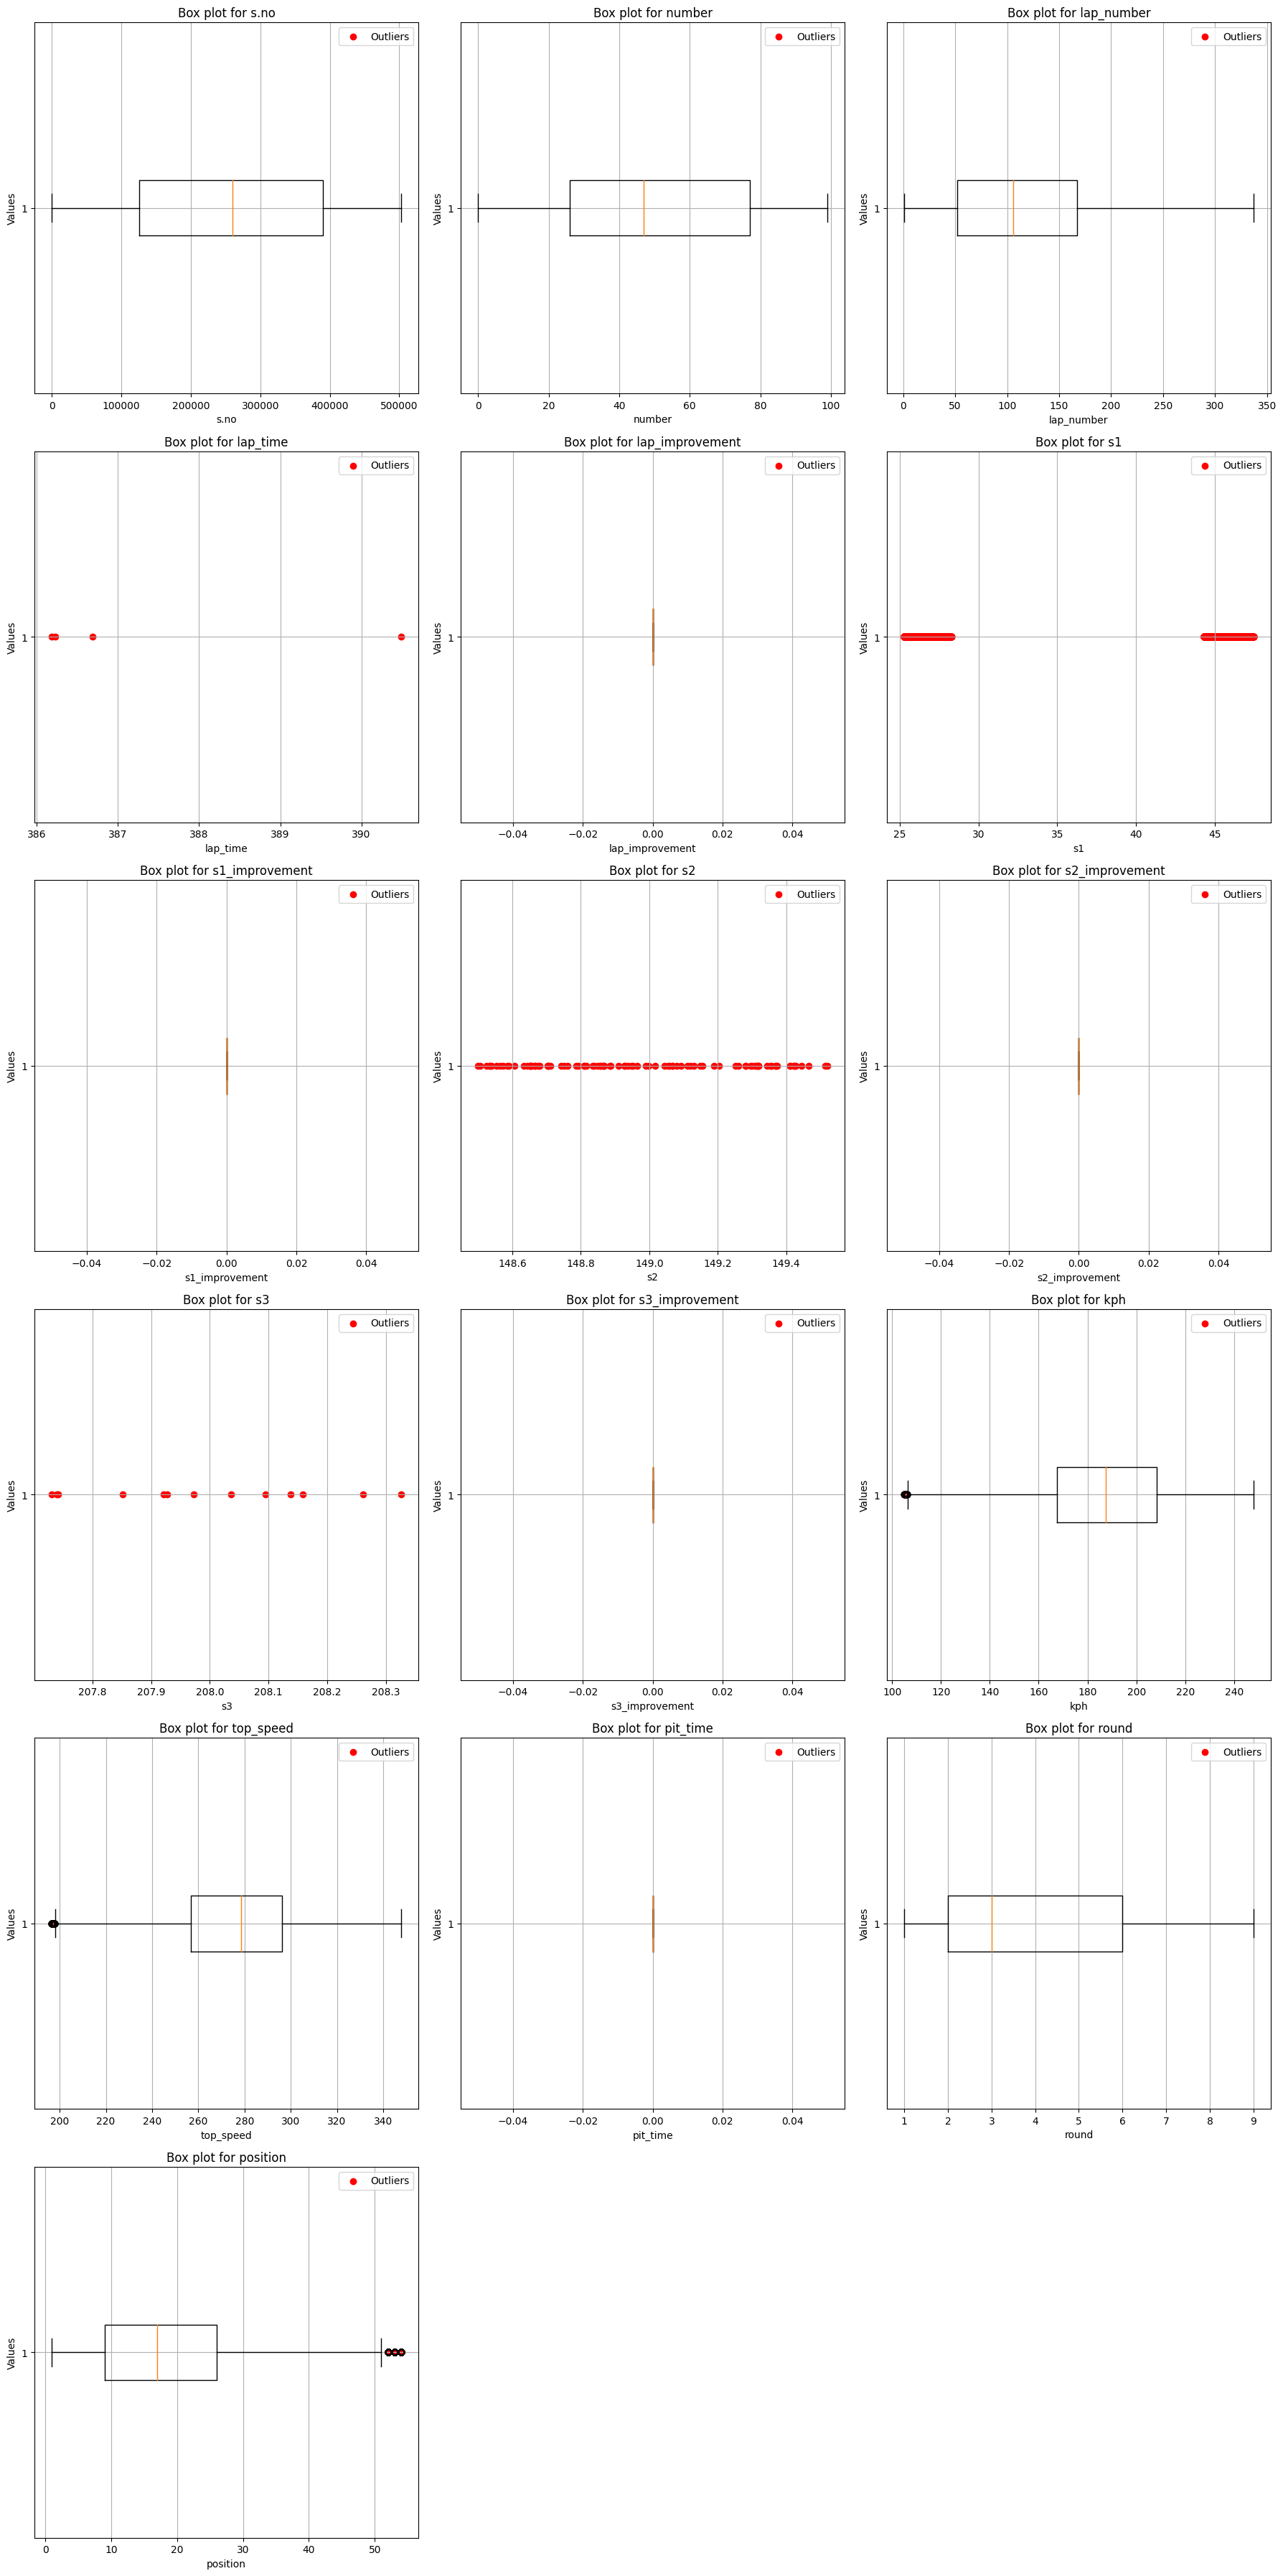

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_outliers_boxplots(df):
    num_cols = df.select_dtypes(include='number').columns.size
    num_rows = (num_cols + 2) // 3 
    
    fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, 6 * num_rows)) 
    axes = axes.flatten() 
    
    current_plot = 0
    
    for column in df.select_dtypes(include='number').columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        
        axes[current_plot].boxplot(df[column], vert=False)
        axes[current_plot].set_title(f'Box plot for {column}')
        axes[current_plot].set_xlabel(column)
        axes[current_plot].set_ylabel('Values')
        axes[current_plot].grid(True)
        axes[current_plot].scatter(outliers, [1] * len(outliers), color='r', label='Outliers')
        axes[current_plot].legend()
        
        current_plot += 1 
    for i in range(current_plot, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()
plot_outliers_boxplots(df) 

### Exploratory Data Analysis

In [15]:
print("Columns in the DataFrame:")
for col in df.columns:
    print(col)


Columns in the DataFrame:
s.no
number
lap_number
lap_time
lap_improvement
s1
s1_improvement
s2
s2_improvement
s3
s3_improvement
kph
top_speed
driver_name
pit_time
class
Team
manufacturer
season
circuit
round
vehicle
engine
position


In [16]:
summary_stats = df[['s1', 's2', 's3', 'lap_time']].describe()
print(summary_stats)

                  s1             s2             s3       lap_time
count  345944.000000  345801.000000  345856.000000  345661.000000
mean       36.311744      63.943850      65.704810     165.932564
std         3.628621      21.406102      36.292697      56.811623
min        25.302000      28.552000      15.222000      85.809000
25%        34.281000      44.307000      35.230000     119.099000
50%        36.669000      58.998000      40.919000     132.168000
75%        38.286000      85.982000     104.183250     225.903000
max        47.432000     149.520000     208.326000     390.490000


In [17]:
columns_to_find_mode = ['s1', 's2', 's3', 'lap_time', 'top_speed', 'kph']
modes = df[columns_to_find_mode].mode()

print(modes)

       s1      s2      s3  lap_time  top_speed    kph
0  36.822  89.596  36.343   120.248      293.2  206.2
1     NaN     NaN     NaN   123.710        NaN  208.3


In [18]:
columns_to_find_median = ['s1', 's2', 's3', 'lap_time', 'top_speed', 'kph']
medians = df[columns_to_find_median].median()

print(medians)

s1            36.669
s2            58.998
s3            40.919
lap_time     132.168
top_speed    278.400
kph          187.400
dtype: float64


In [19]:
import pandas as pd
missing_values_per_column = df.isnull().sum()
print("Missing Values Count for Each Column:")
print(missing_values_per_column)

Missing Values Count for Each Column:
s.no                 0
number               0
lap_number           0
lap_time           349
lap_improvement      0
s1                  66
s1_improvement       0
s2                 209
s2_improvement       0
s3                 154
s3_improvement       0
kph                  0
top_speed            0
driver_name          0
pit_time             0
class                0
Team                 0
manufacturer         0
season               0
circuit              0
round                0
vehicle              0
engine               0
position             0
dtype: int64


In [20]:
import pandas as pd
df.dropna(inplace=True)
print("Shape of DataFrame after dropping missing values:", df.shape)

Shape of DataFrame after dropping missing values: (345452, 24)


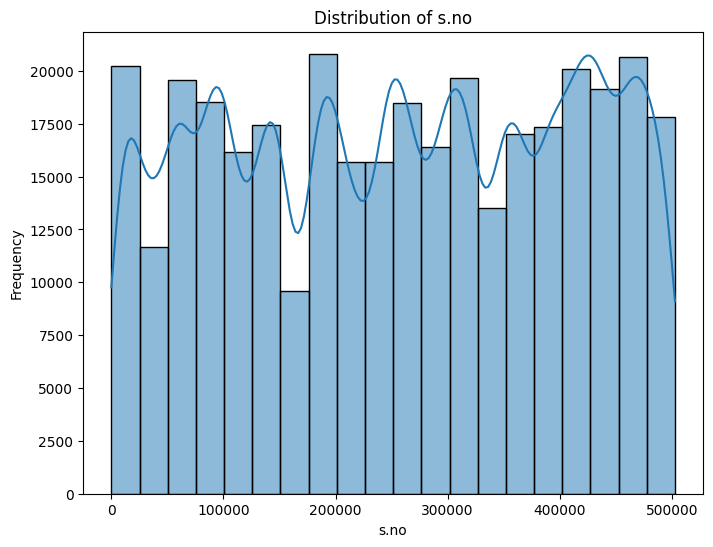

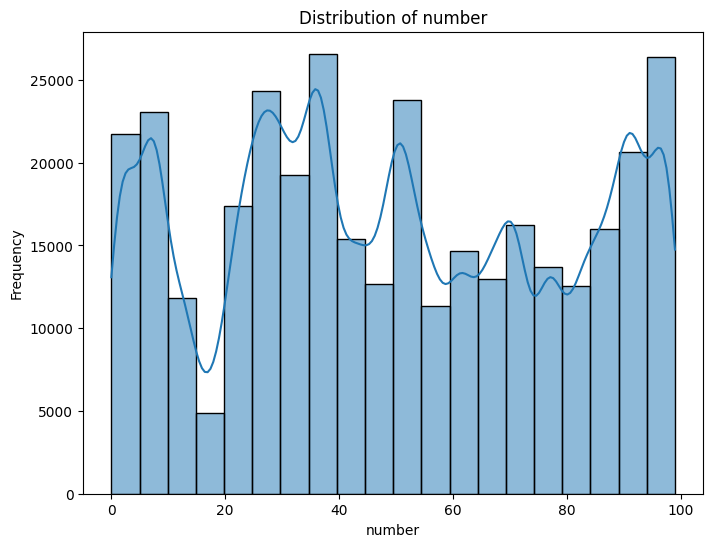

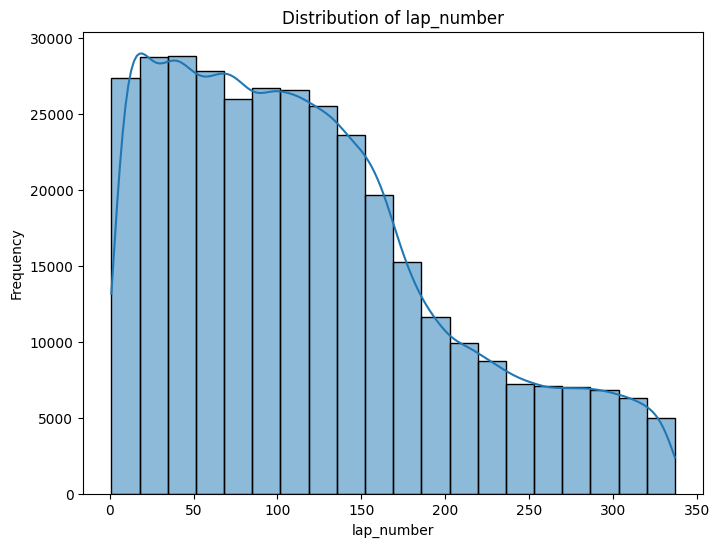

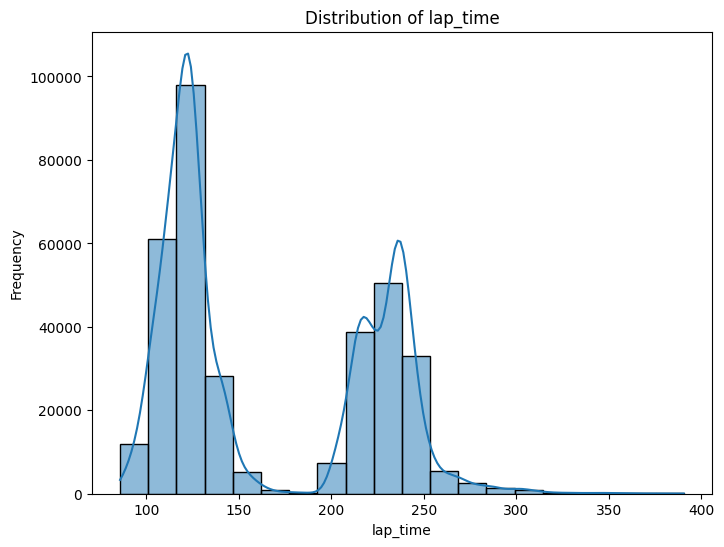

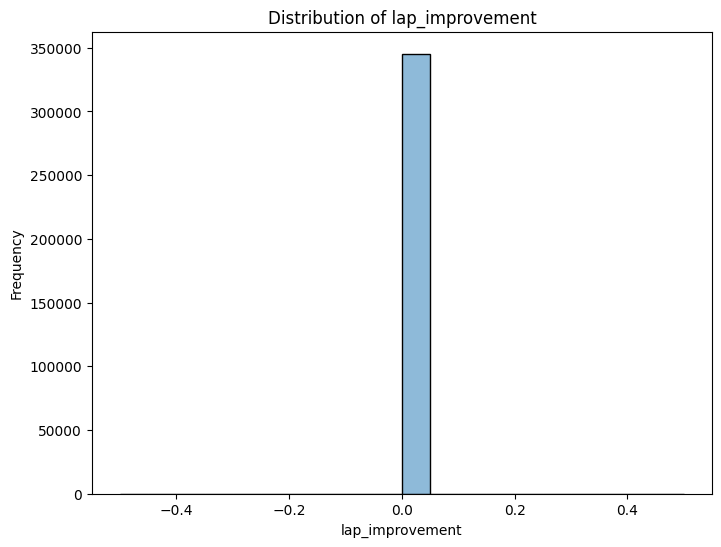

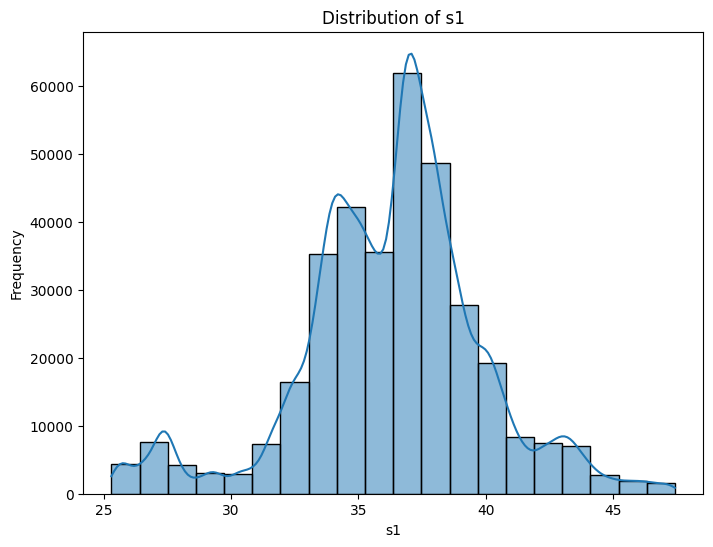

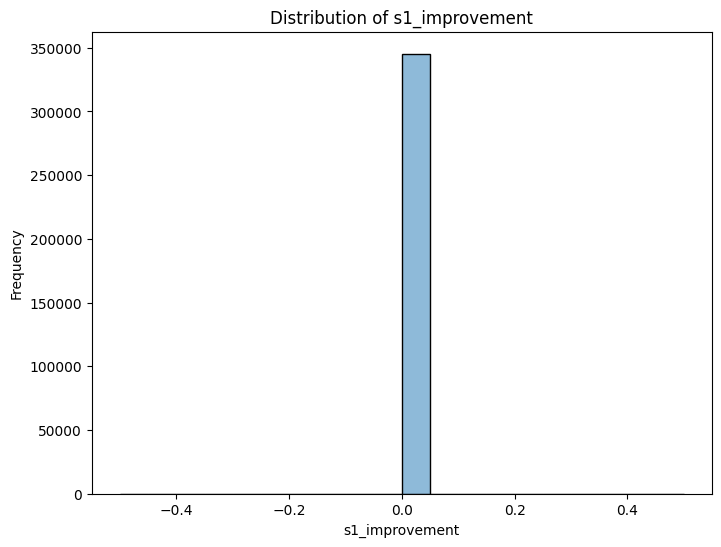

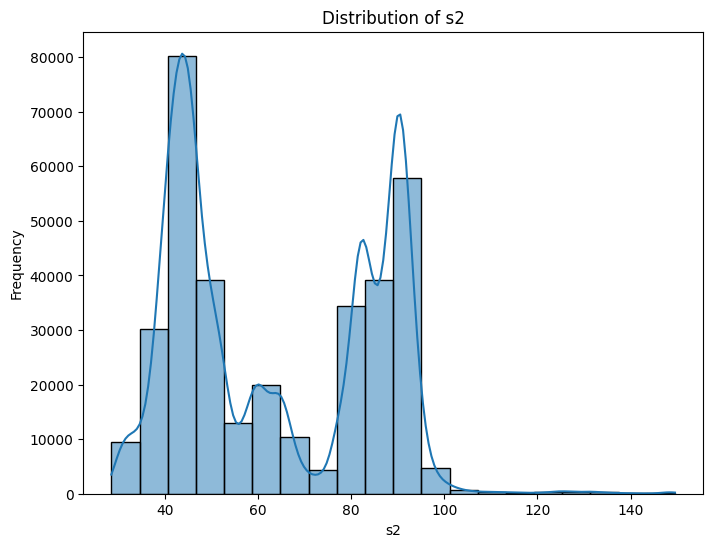

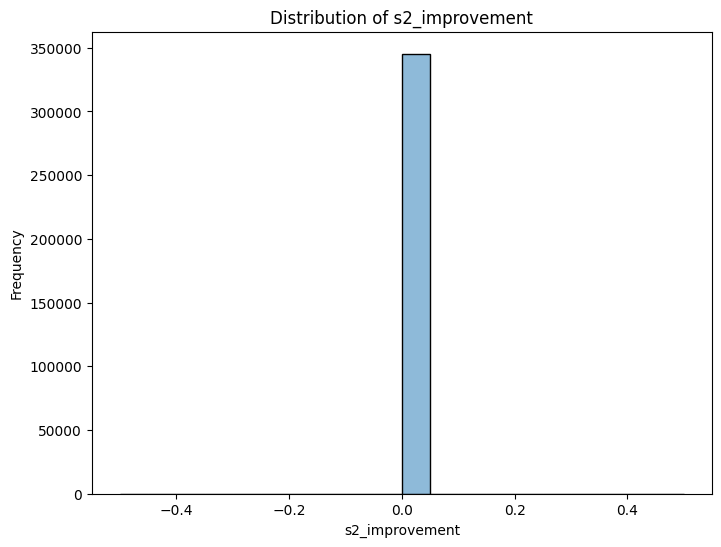

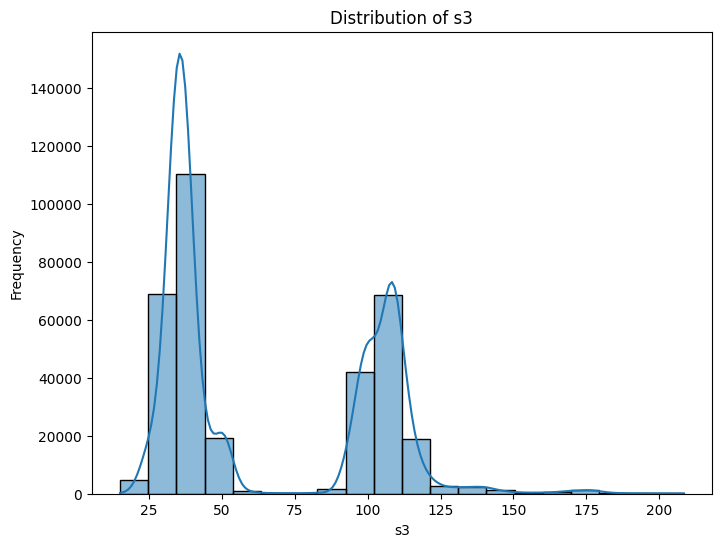

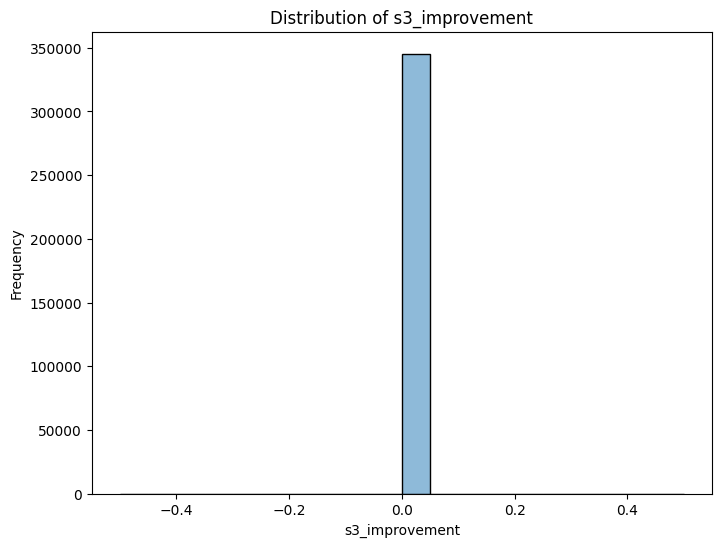

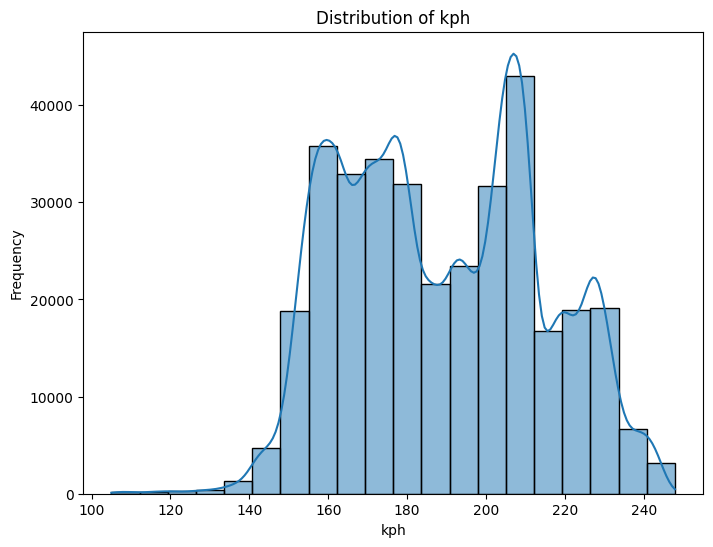

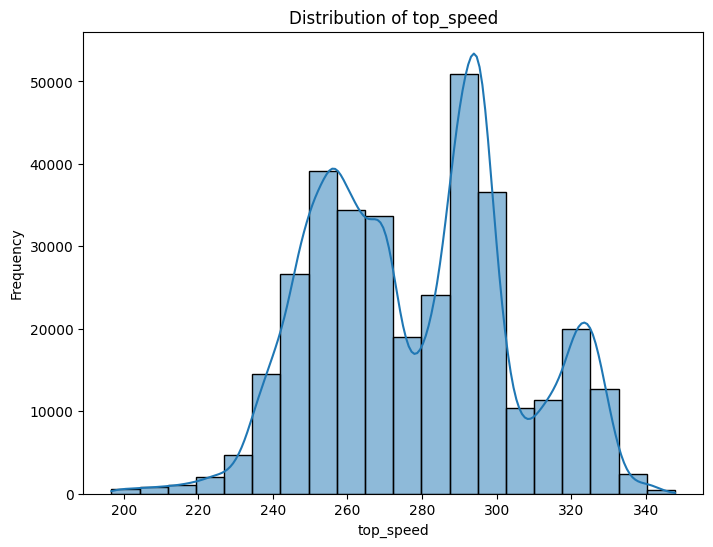

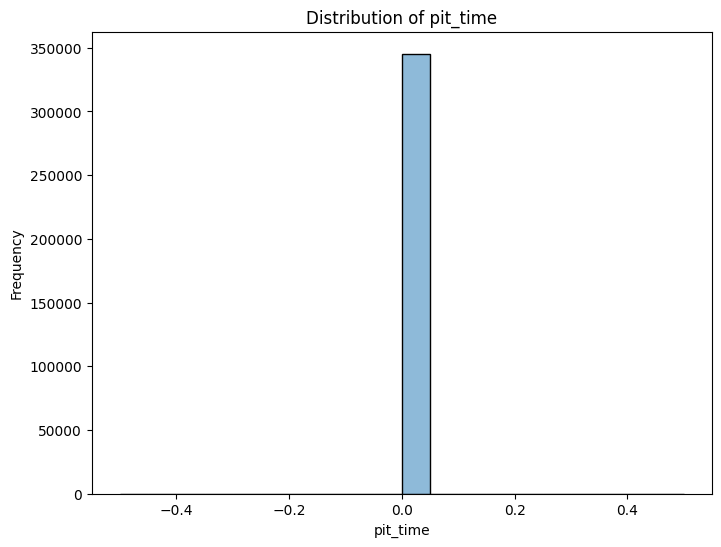

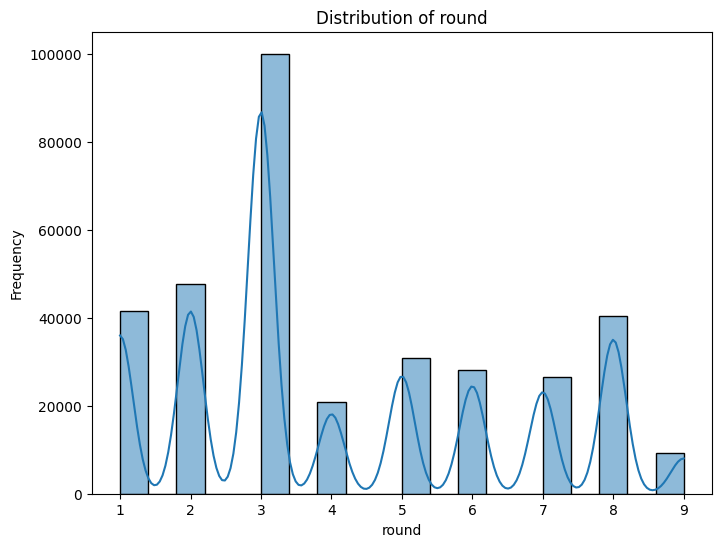

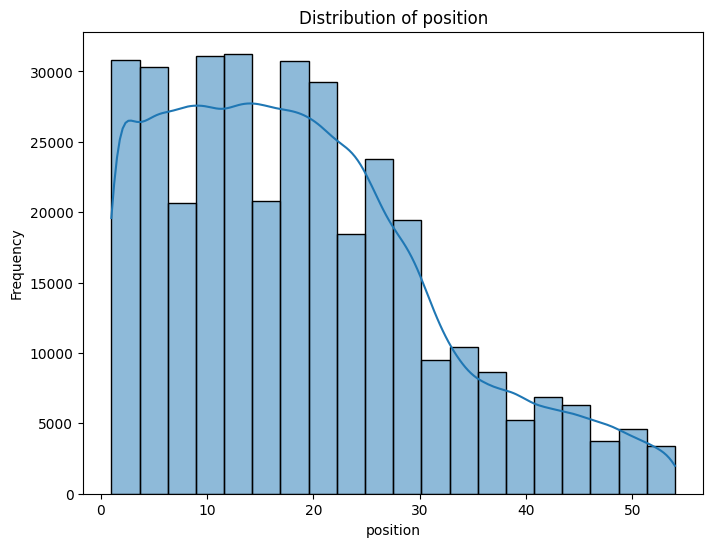

In [21]:
import seaborn as sns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

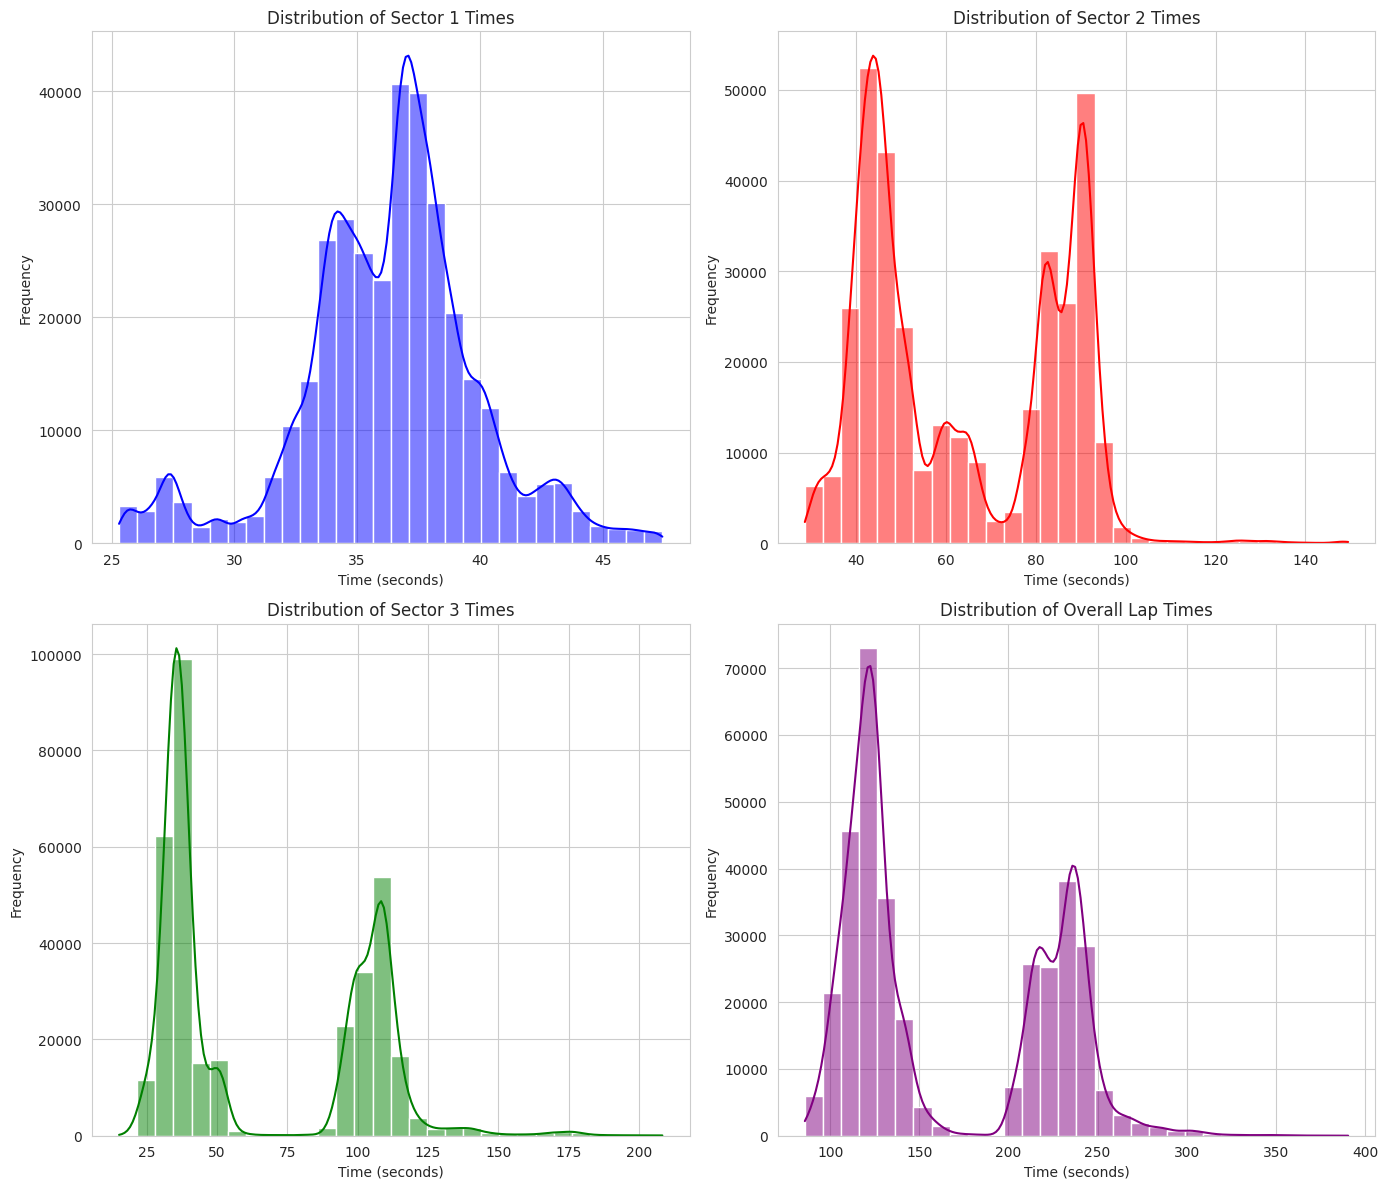

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set_style("whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

sns.histplot(df['s1'], kde=True, color='blue', bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Sector 1 Times')
axs[0, 0].set_xlabel('Time (seconds)')
axs[0, 0].set_ylabel('Frequency')

sns.histplot(df['s2'], kde=True, color='red', bins=30, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Sector 2 Times')
axs[0, 1].set_xlabel('Time (seconds)')
axs[0, 1].set_ylabel('Frequency')

sns.histplot(df['s3'], kde=True, color='green', bins=30, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Sector 3 Times')
axs[1, 0].set_xlabel('Time (seconds)')
axs[1, 0].set_ylabel('Frequency')

sns.histplot(df['lap_time'], kde=True, color='purple', bins=30, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Overall Lap Times')
axs[1, 1].set_xlabel('Time (seconds)')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

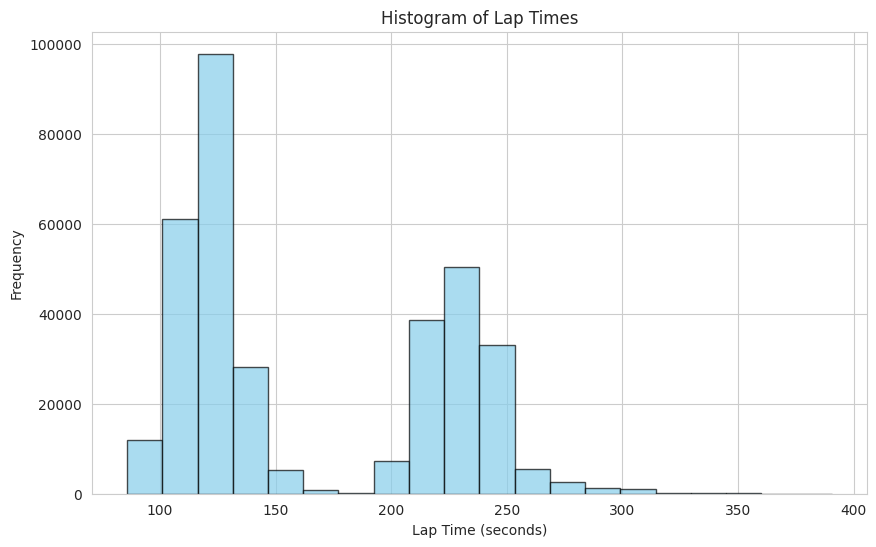

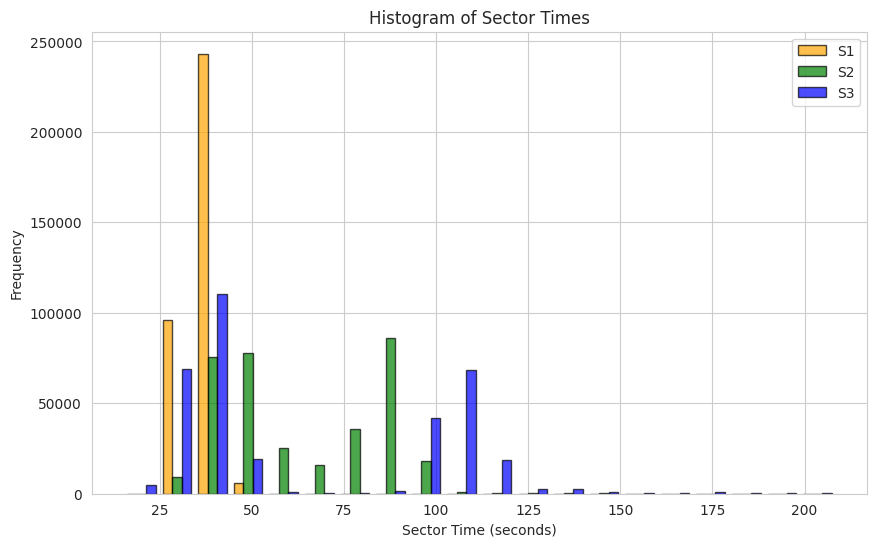

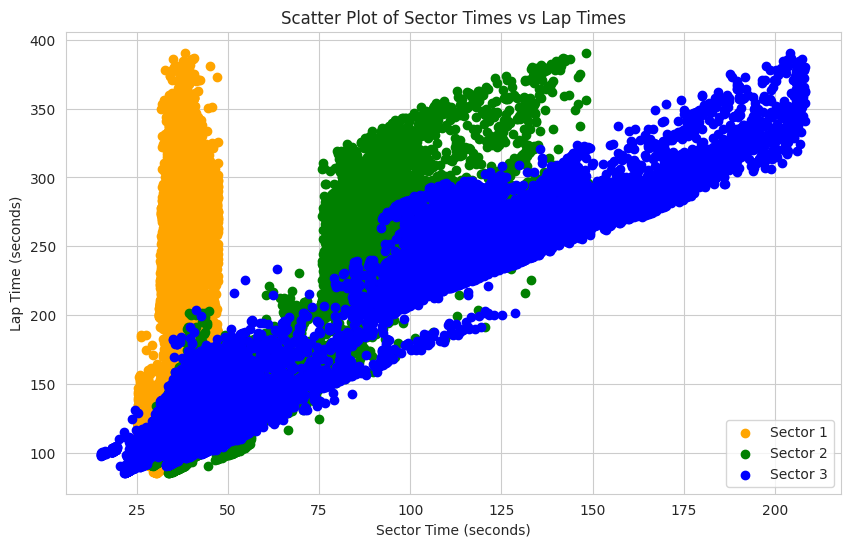

In [23]:
import matplotlib.pyplot as plt

def visualize_sector_lap_times(df):
    s1 = df['s1']
    s2 = df['s2']
    s3 = df['s3']
    lap_time = df['lap_time']

    plt.figure(figsize=(10, 6))
    plt.hist(lap_time, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Lap Time (seconds)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Lap Times')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.hist([s1, s2, s3], bins=20, color=['orange', 'green', 'blue'], edgecolor='black', alpha=0.7, label=['S1', 'S2', 'S3'])
    plt.xlabel('Sector Time (seconds)')
    plt.ylabel('Frequency')
    plt.title('Histogram of Sector Times')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(s1, lap_time, color='orange', label='Sector 1')
    plt.scatter(s2, lap_time, color='green', label='Sector 2')
    plt.scatter(s3, lap_time, color='blue', label='Sector 3')
    plt.xlabel('Sector Time (seconds)')
    plt.ylabel('Lap Time (seconds)')
    plt.title('Scatter Plot of Sector Times vs Lap Times')
    plt.legend()
    plt.show()
    
visualize_sector_lap_times(df)

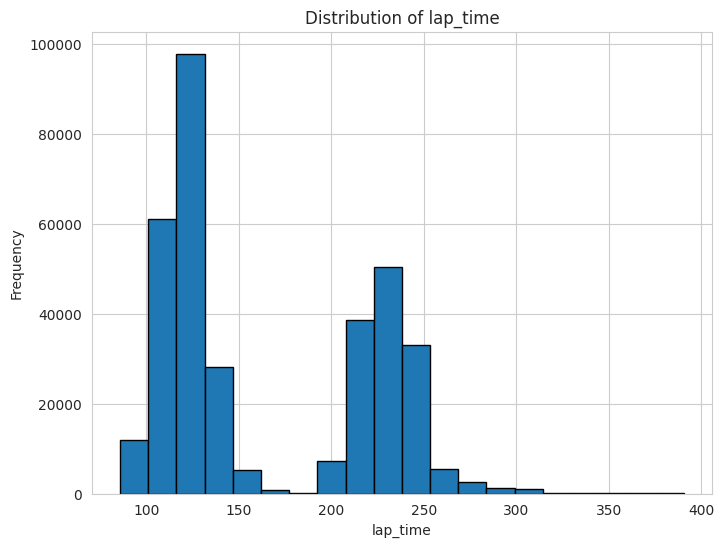

/tmp/ipykernel_1517434/2106760797.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['lap_time'], shade=True)


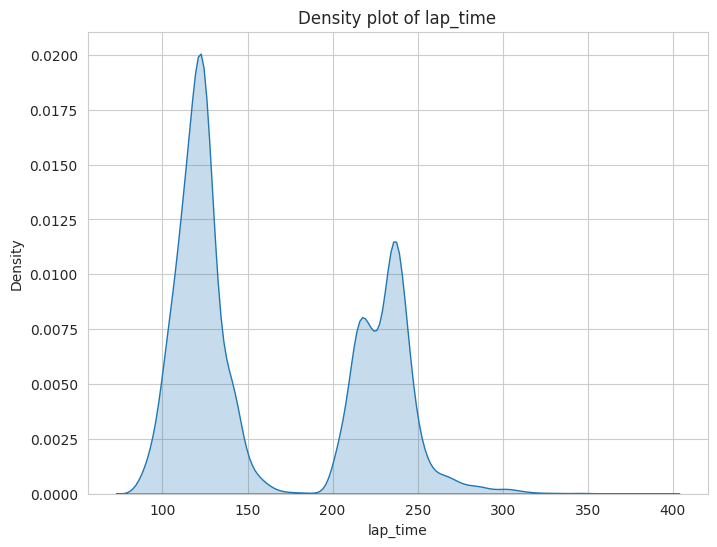

In [24]:

plt.figure(figsize=(8, 6))
plt.hist(df['lap_time'], bins=20, edgecolor='black')
plt.title('Distribution of lap_time')
plt.xlabel('lap_time')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.kdeplot(df['lap_time'], shade=True)
plt.title('Density plot of lap_time')
plt.xlabel('lap_time')
plt.ylabel('Density')
plt.show()


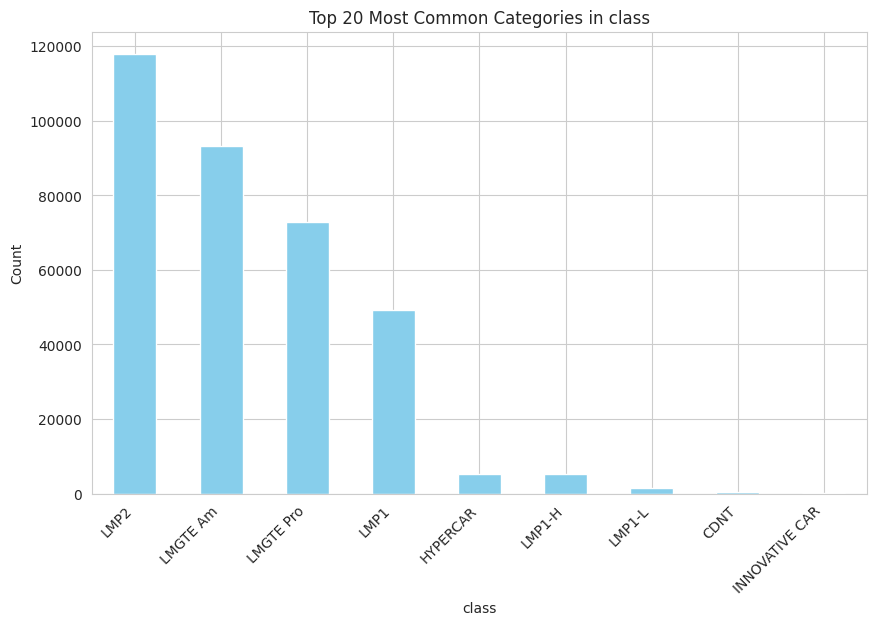

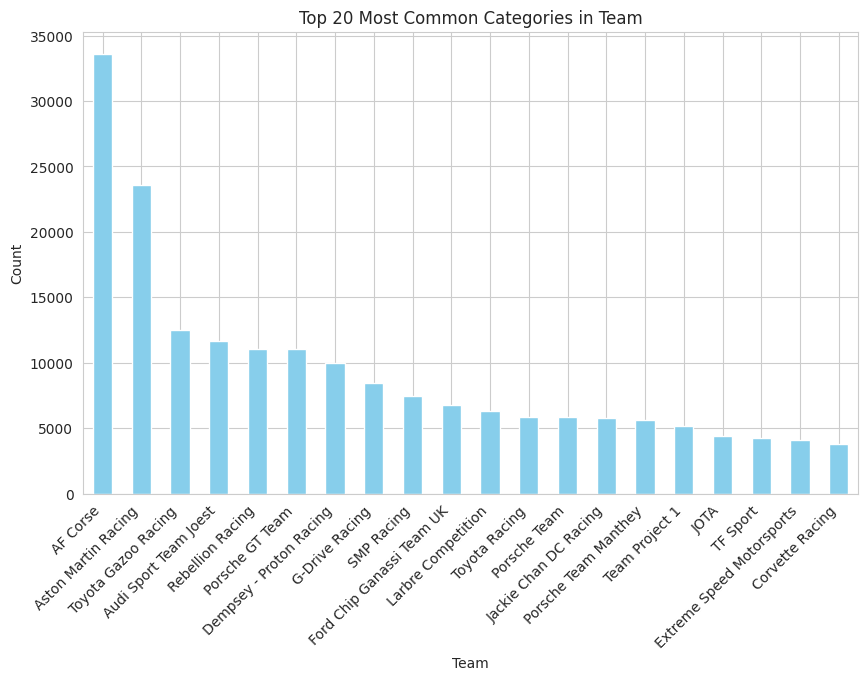

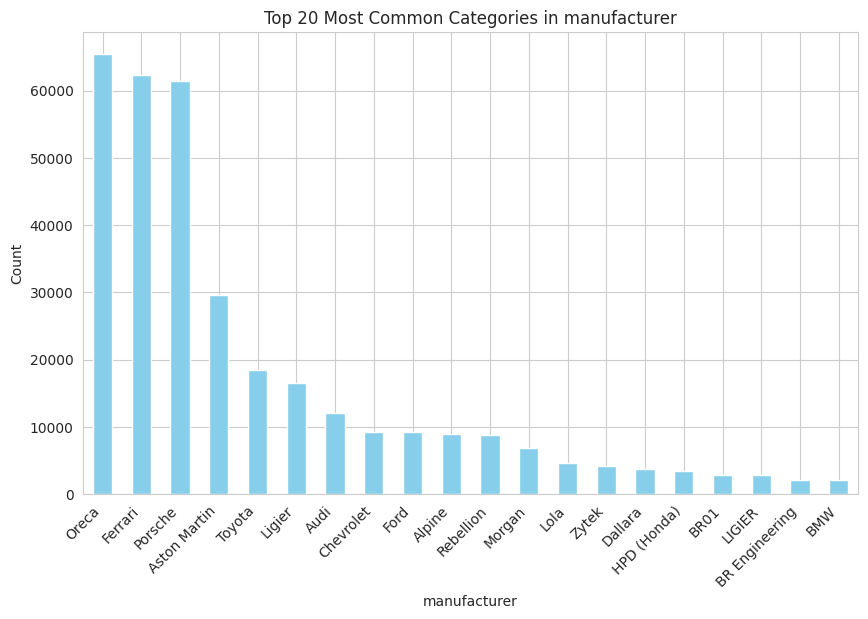

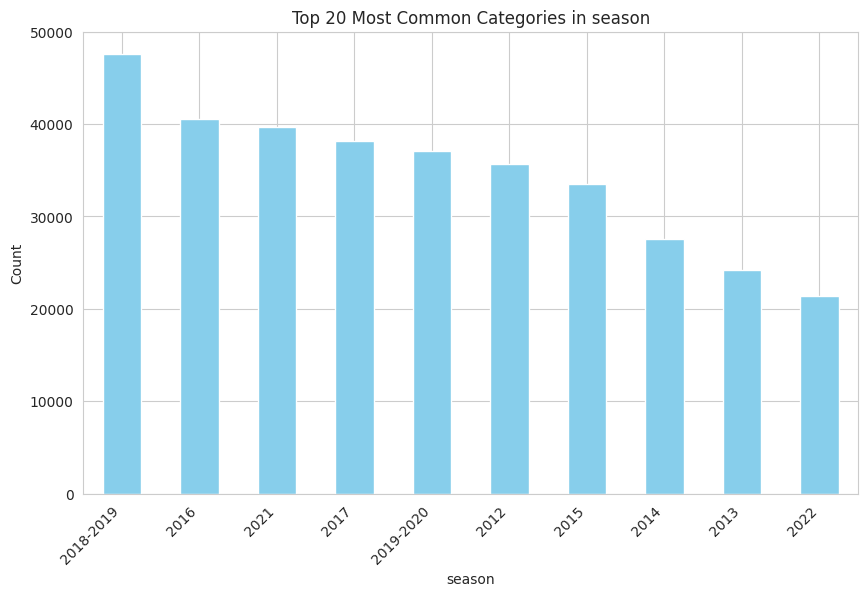

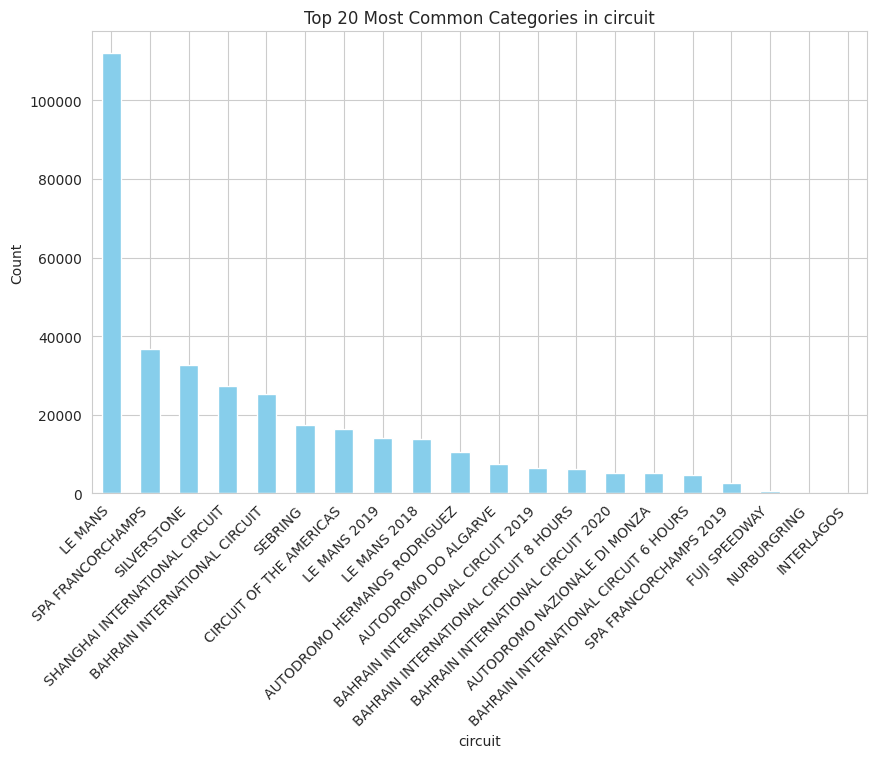

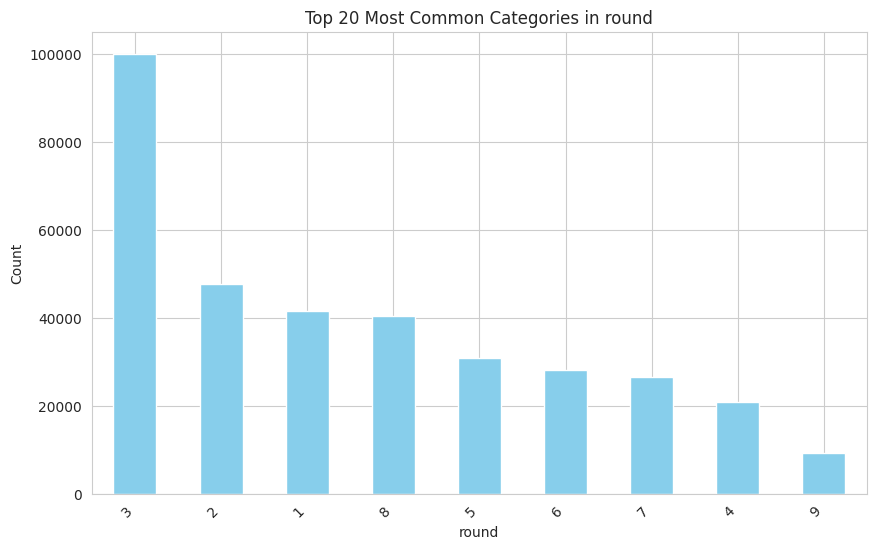

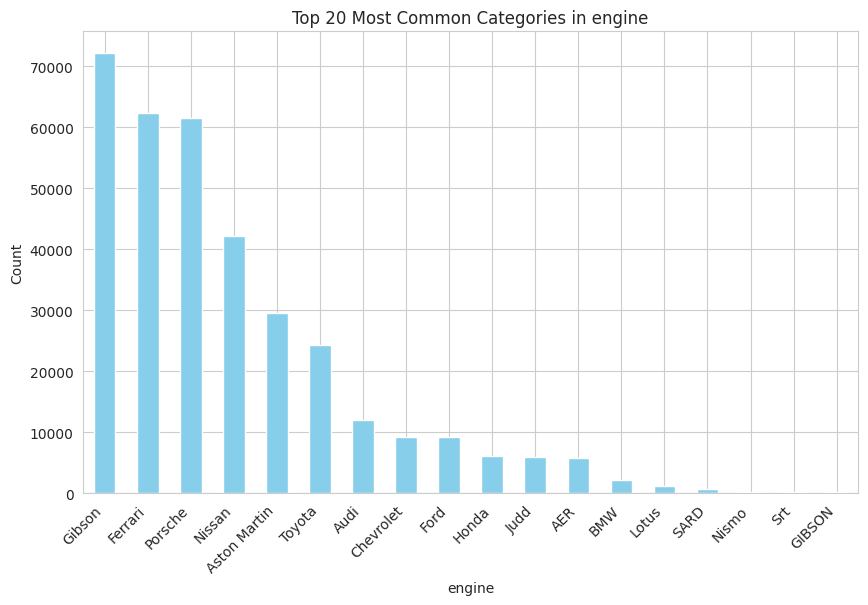

In [25]:
import matplotlib.pyplot as plt


categorical_cols = ['class', 'Team', 'manufacturer', 'season', 'circuit', 'round', 'engine']

top_n = 20  

for col in categorical_cols:

    top_categories = df[col].value_counts().nlargest(top_n)
    
    plt.figure(figsize=(10, 6))
    top_categories.plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} Most Common Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') 
    plt.show()


/tmp/ipykernel_1517434/2500373887.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:top_n].index, palette='viridis')


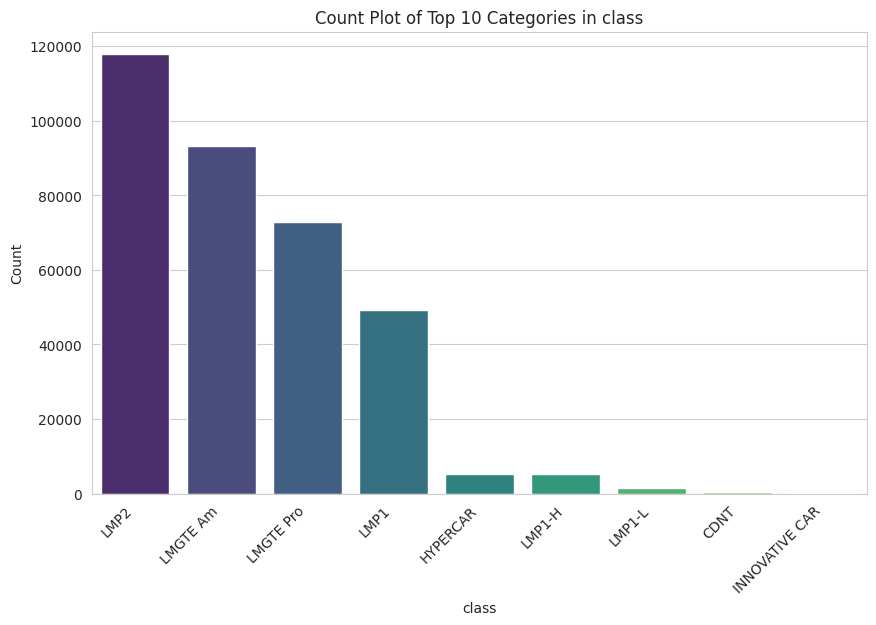

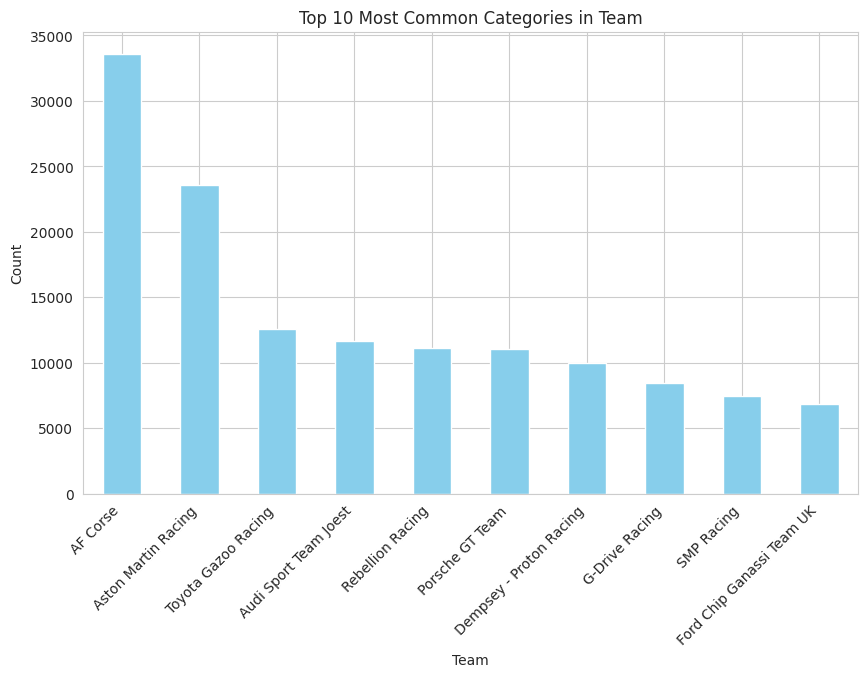

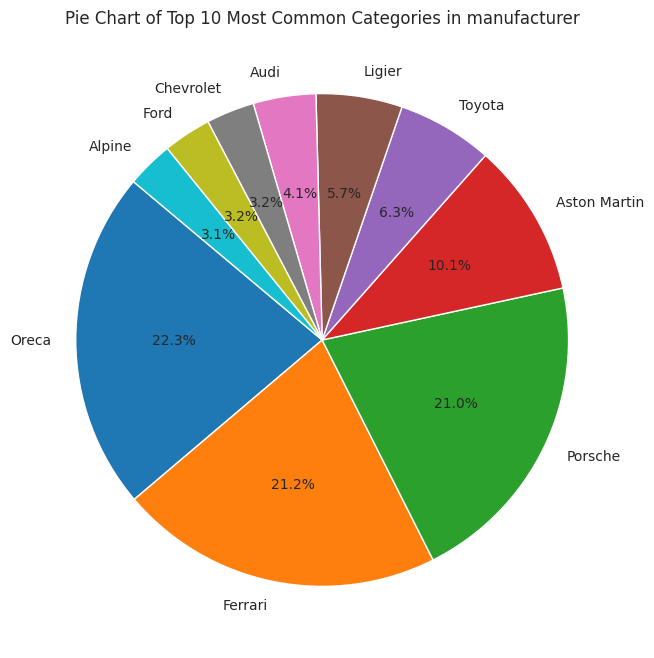

/tmp/ipykernel_1517434/2500373887.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:top_n].index, palette='viridis')


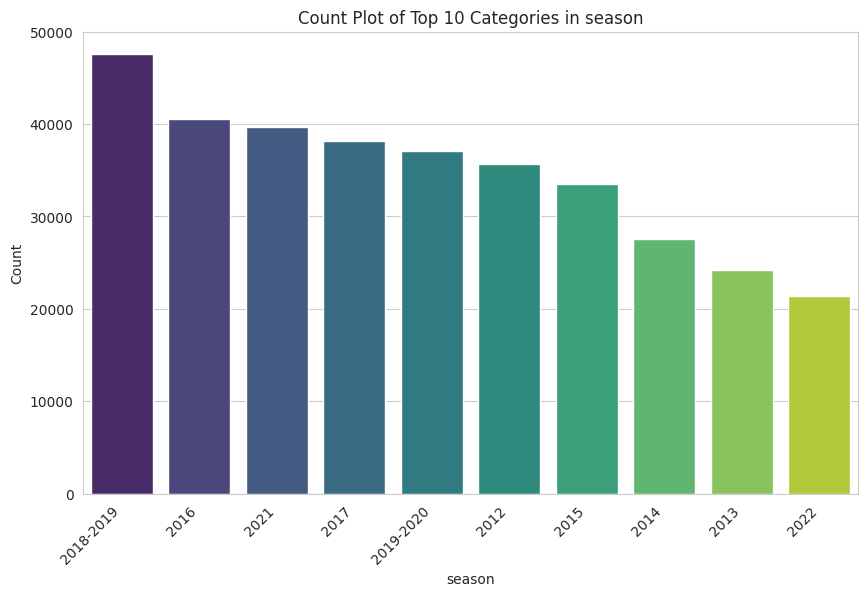

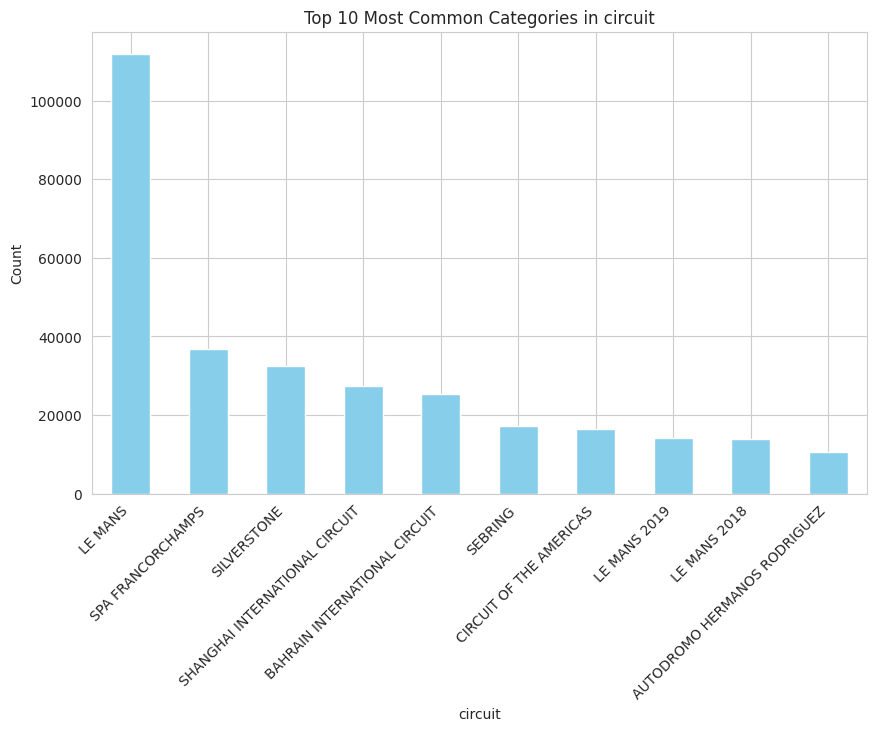

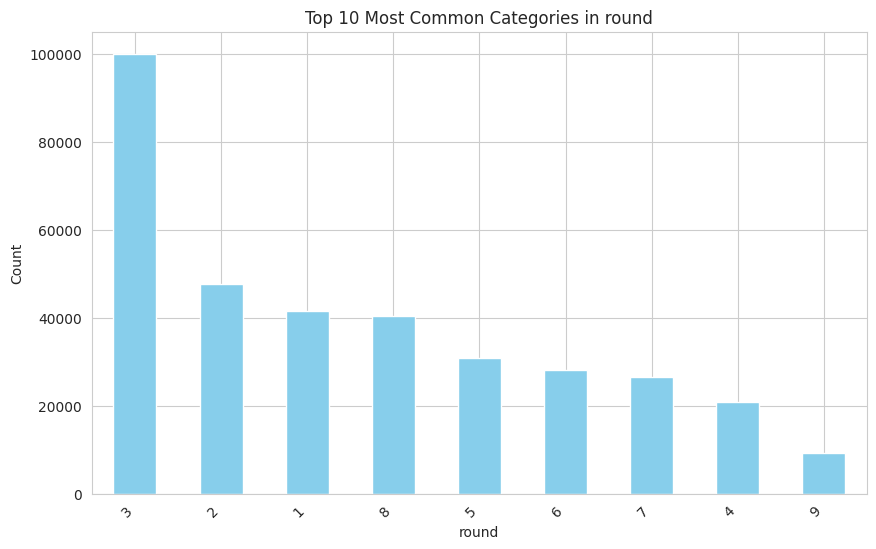

/tmp/ipykernel_1517434/2500373887.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=col, palette='Set2')


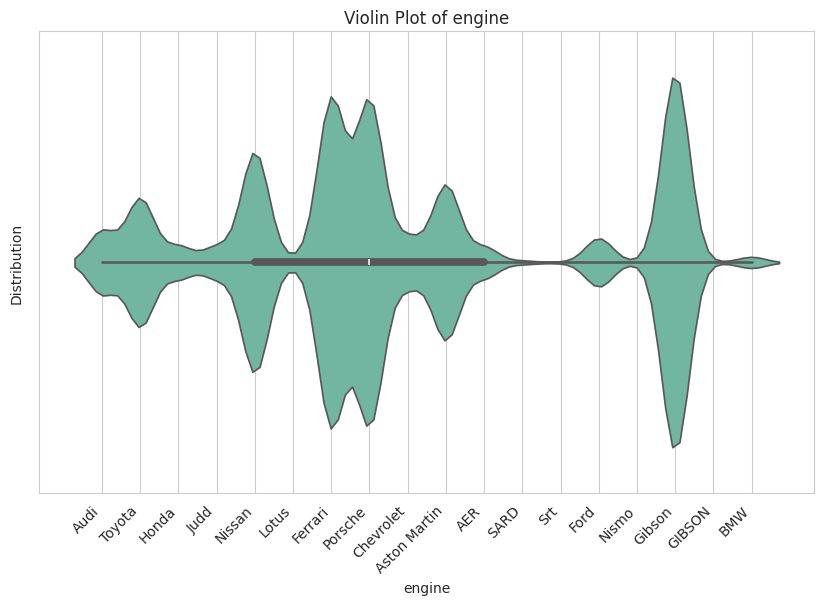

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


categorical_cols = ['class', 'Team', 'manufacturer', 'season', 'circuit', 'round', 'engine']


top_n = 10  

for col in categorical_cols:
    
    top_categories = df[col].value_counts().nlargest(top_n)
    
    
    if col == 'manufacturer':
        
        plt.figure(figsize=(8, 8))
        plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Pie Chart of Top {top_n} Most Common Categories in {col}')
        plt.show()
    elif col in ['class', 'season']:
        
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col, order=df[col].value_counts().iloc[:top_n].index, palette='viridis')
        plt.title(f'Count Plot of Top {top_n} Categories in {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    elif col == 'engine':
        
        plt.figure(figsize=(10, 6))
        sns.violinplot(data=df, x=col, palette='Set2')
        plt.title(f'Violin Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Distribution')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    else:
        
        plt.figure(figsize=(10, 6))
        top_categories.plot(kind='bar', color='skyblue')
        plt.title(f'Top {top_n} Most Common Categories in {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.show()


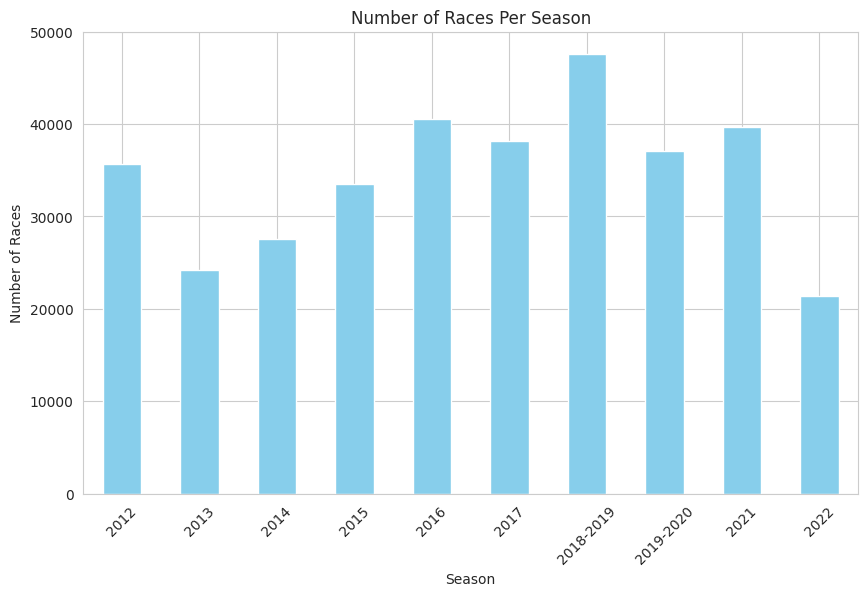

In [27]:
import matplotlib.pyplot as plt

races_per_season = df.groupby('season').size()
plt.figure(figsize=(10, 6))
races_per_season.plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Number of Races')
plt.title('Number of Races Per Season')
plt.xticks(rotation=45)
plt.show()

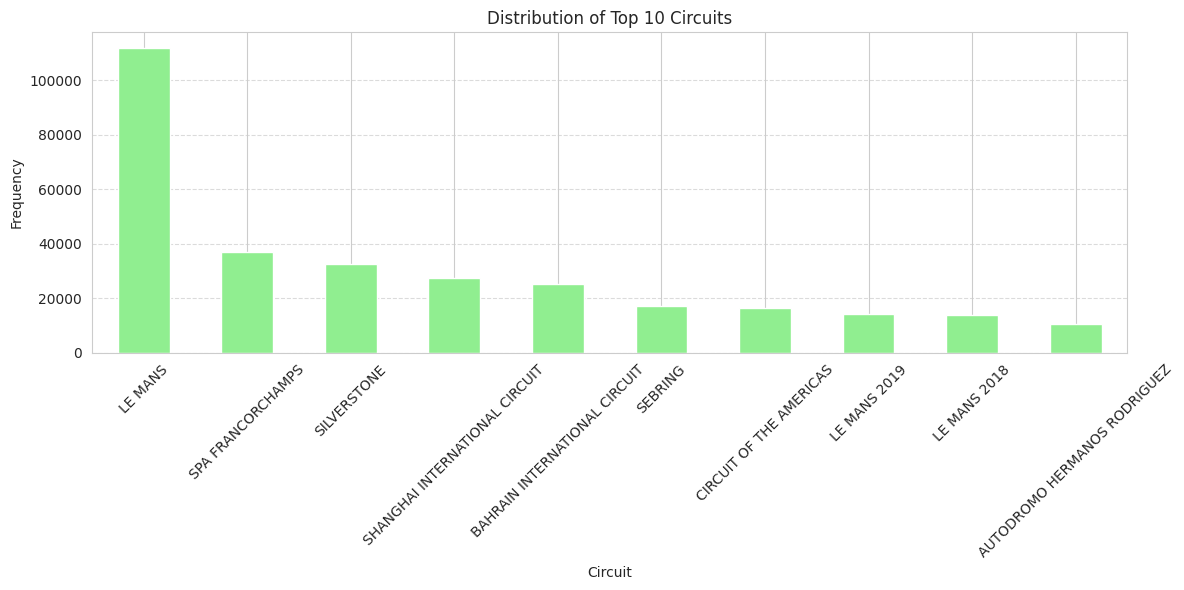

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

circuit_counts = df['circuit'].value_counts().head(10) 
plt.figure(figsize=(12, 6))
circuit_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Top 10 Circuits')
plt.xlabel('Circuit')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

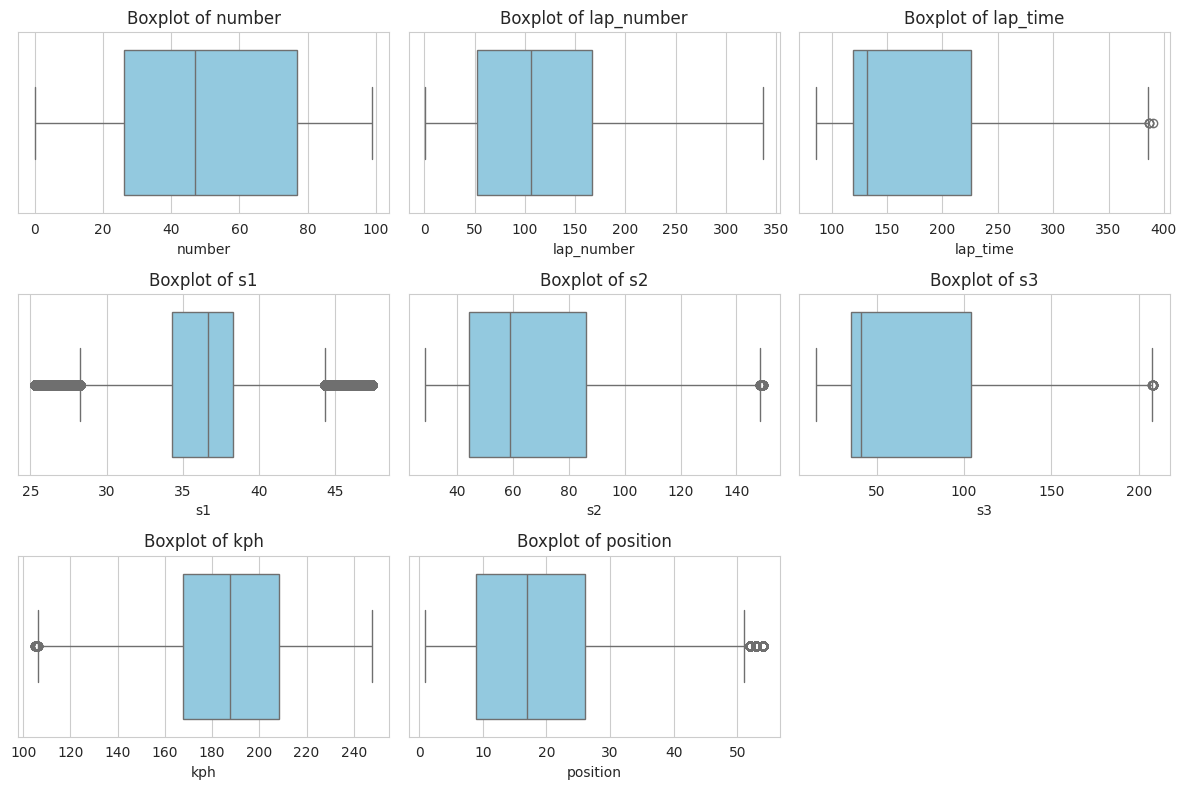

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_visualize = ['number', 'lap_number', 'lap_time', 's1', 's2', 's3', 'kph', 'position']
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df[column], orient='h', color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

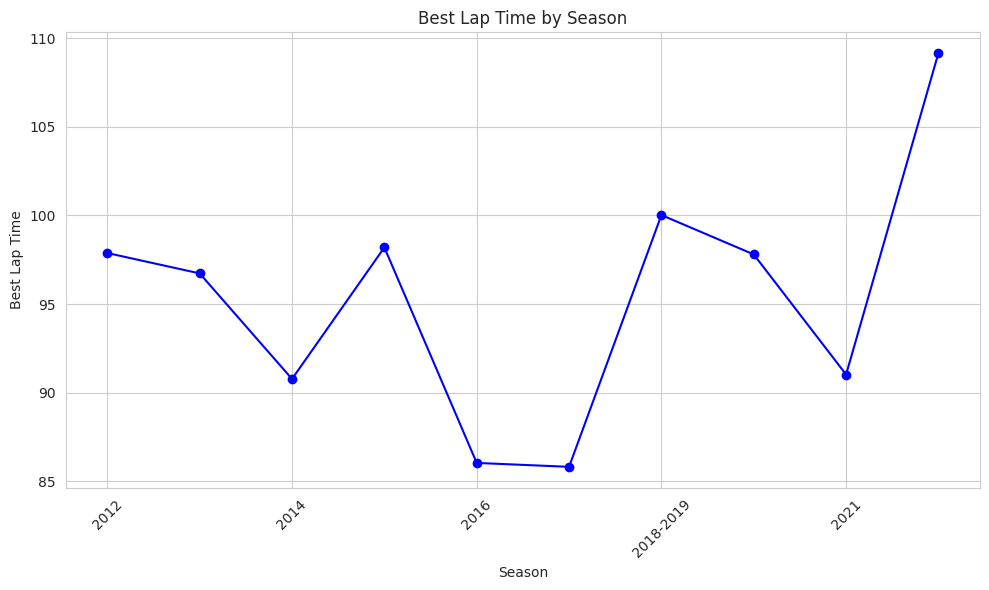

In [30]:
import matplotlib.pyplot as plt


best_laptime_by_season = df.groupby('season')['lap_time'].min()


plt.figure(figsize=(10, 6))
best_laptime_by_season.plot(marker='o', color='b', linestyle='-')
plt.title('Best Lap Time by Season')
plt.xlabel('Season')
plt.ylabel('Best Lap Time')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()


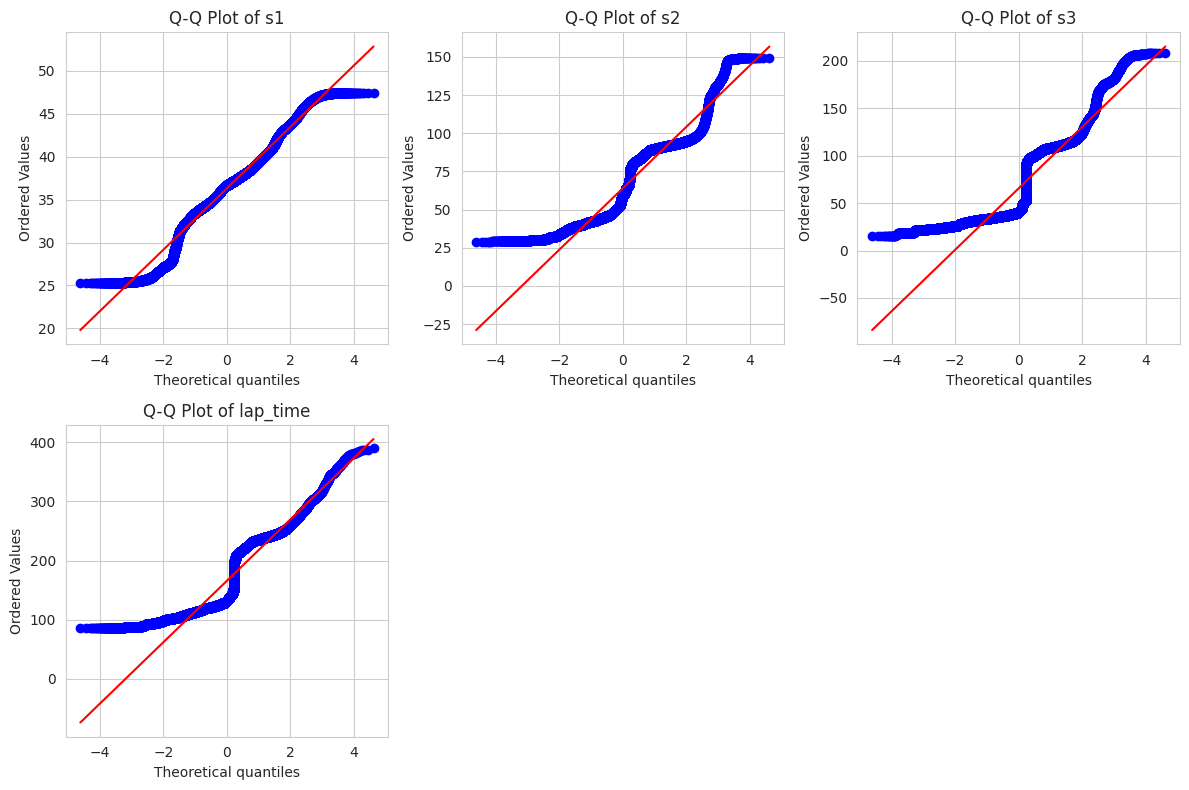

In [31]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
stats.probplot(df['s1'], dist="norm", plot=plt)
plt.title('Q-Q Plot of s1')

plt.subplot(2, 3, 2)
stats.probplot(df['s2'], dist="norm", plot=plt)
plt.title('Q-Q Plot of s2')

plt.subplot(2, 3, 3)
stats.probplot(df['s3'], dist="norm", plot=plt)
plt.title('Q-Q Plot of s3')

plt.subplot(2, 3, 4)
stats.probplot(df['lap_time'], dist="norm", plot=plt)
plt.title('Q-Q Plot of lap_time')

plt.tight_layout()
plt.show()

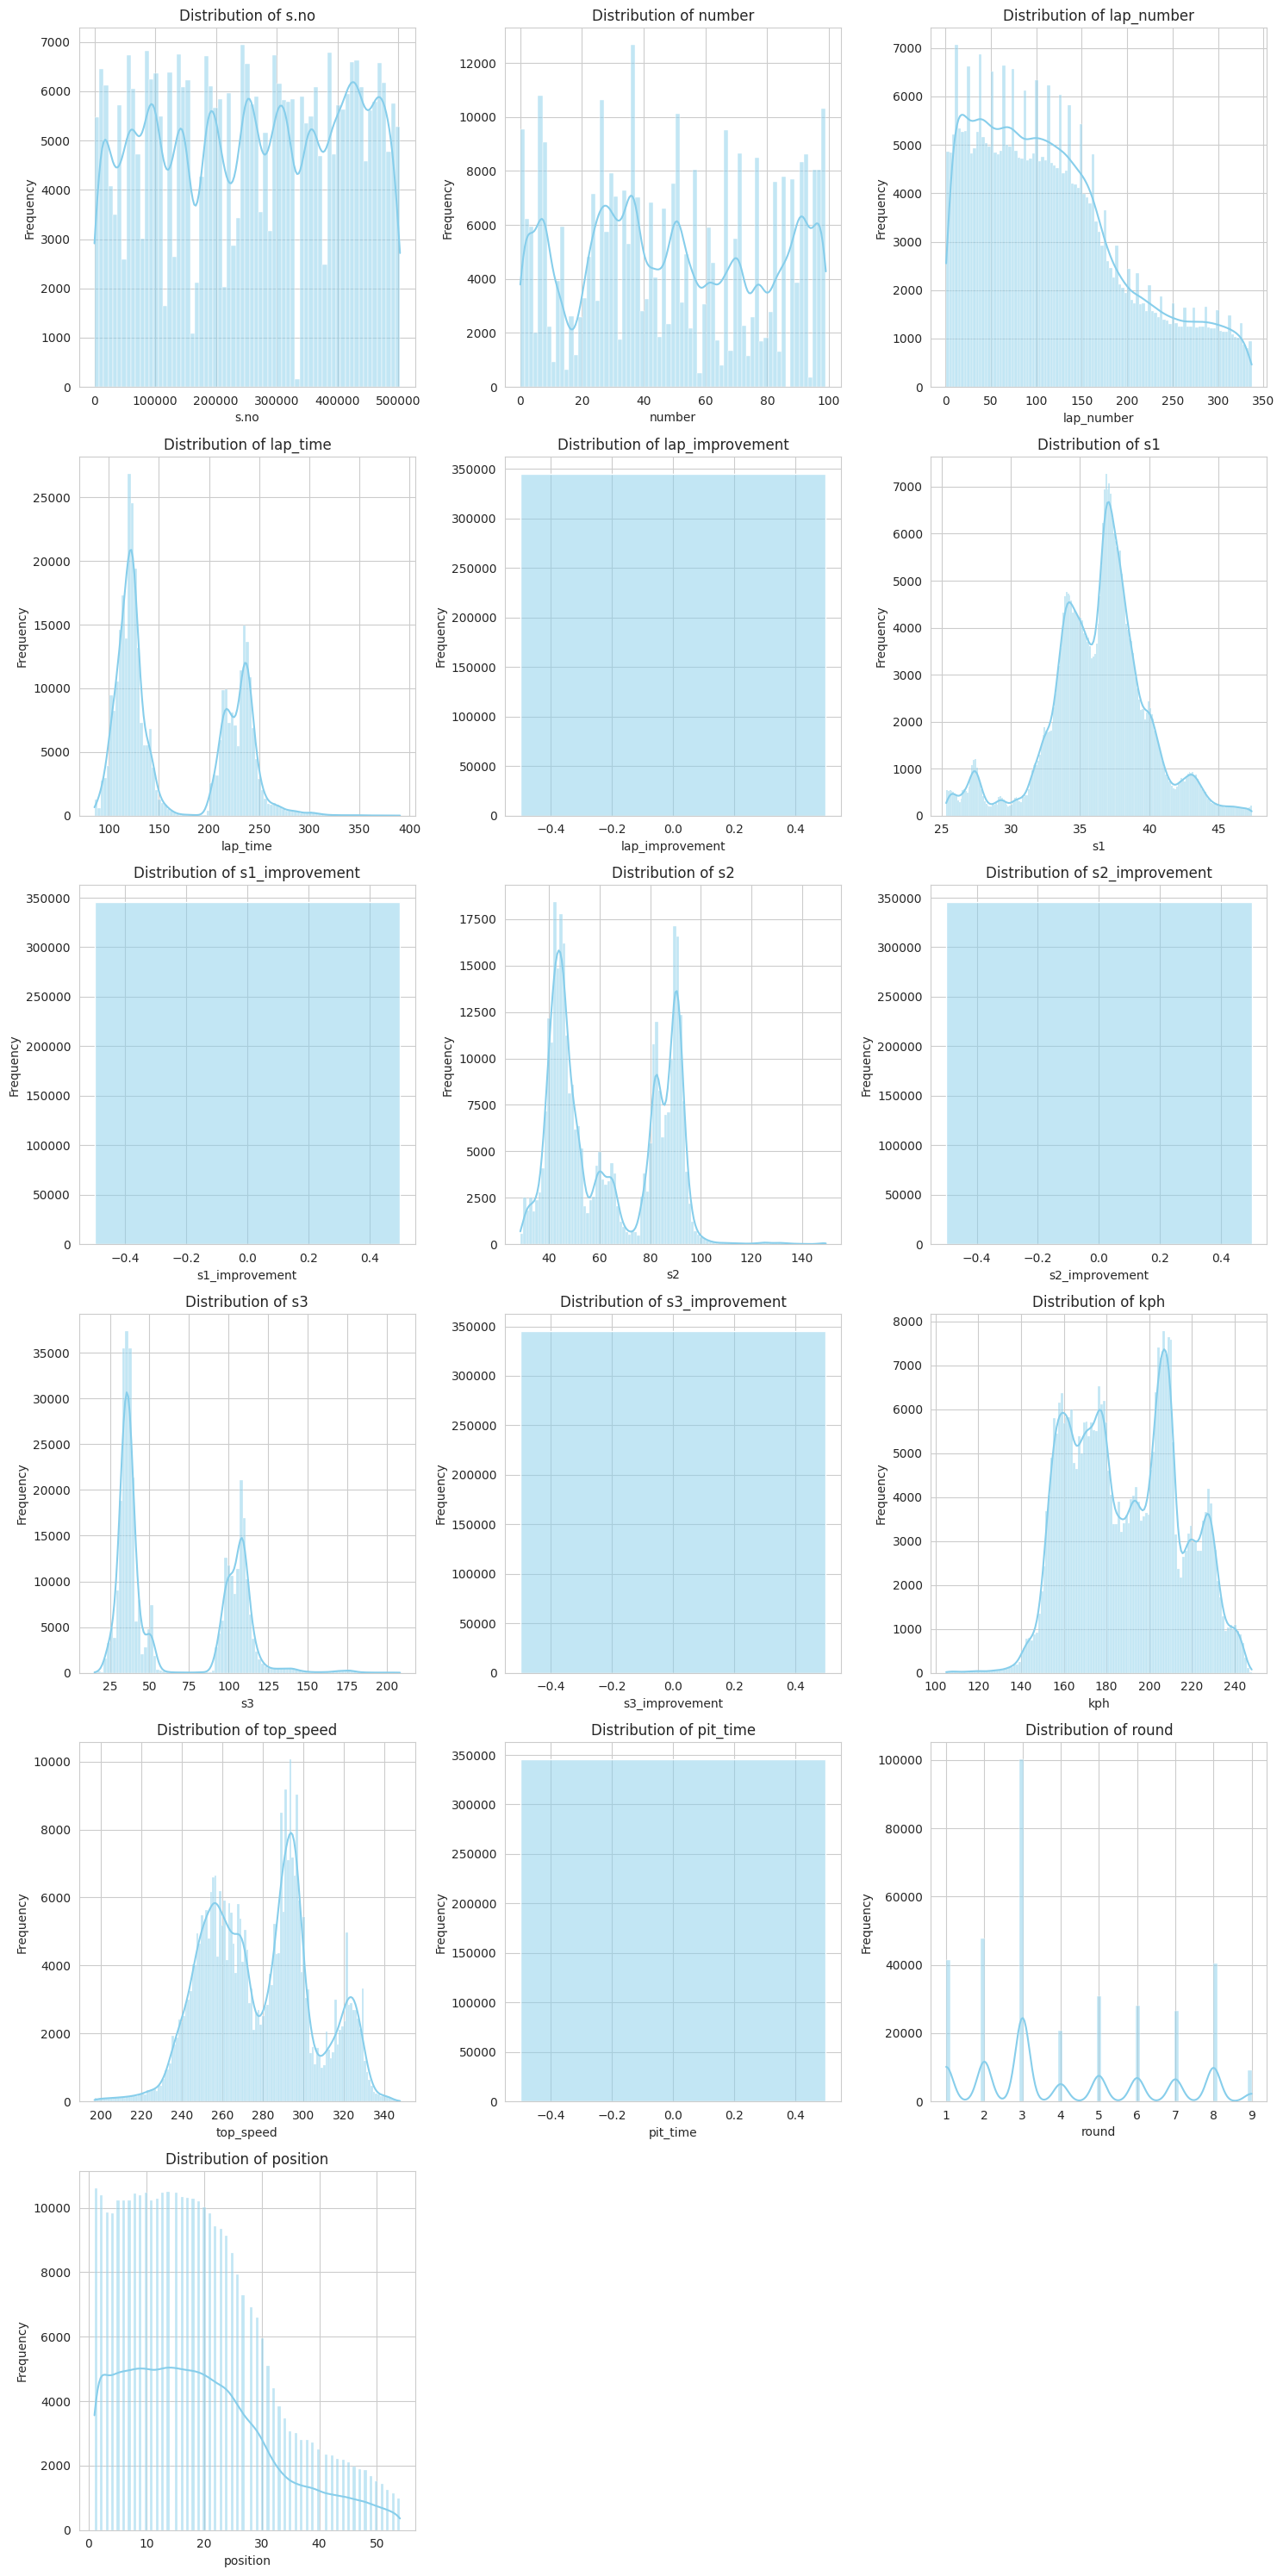

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


numerical_columns = df.select_dtypes(include=['number']).columns


num_plots = len(numerical_columns)
num_rows = num_plots // 3 + (num_plots % 3 > 0)
num_cols = min(num_plots, 3)


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

axes = axes.flatten()


for i, column in enumerate(numerical_columns):

    sns.histplot(data=df[column], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')


for j in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [33]:
from scipy.stats import shapiro
columns_of_interest = ['s1', 's2', 's3', 'lap_time','top_speed','kph'] 
numeric_cols_of_interest = df[columns_of_interest]

for col in numeric_cols_of_interest:
    statistic, p_value = shapiro(numeric_cols_of_interest[col])
    alpha = 0.05
    if p_value > alpha:
        result = "The data looks normally distributed (fail to reject H0)"
    else:
        result = "The data does not look normally distributed (reject H0)"
    print(f"Shapiro-Wilk Test for {col}:")
    print(f"Test Statistic: {statistic}")
    print(f"P-value: {p_value}")
    print(result)
    print()

Shapiro-Wilk Test for s1:
Test Statistic: 0.972507119178772
P-value: 0.0
The data does not look normally distributed (reject H0)

Shapiro-Wilk Test for s2:
Test Statistic: 0.8844500184059143
P-value: 0.0
The data does not look normally distributed (reject H0)

Shapiro-Wilk Test for s3:
Test Statistic: 0.7985954880714417
P-value: 0.0
The data does not look normally distributed (reject H0)

Shapiro-Wilk Test for lap_time:
Test Statistic: 0.8370709419250488
P-value: 0.0
The data does not look normally distributed (reject H0)

Shapiro-Wilk Test for top_speed:
Test Statistic: 0.9813366532325745
P-value: 0.0
The data does not look normally distributed (reject H0)

Shapiro-Wilk Test for kph:
Test Statistic: 0.9731346964836121
P-value: 0.0
The data does not look normally distributed (reject H0)



/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [34]:
from scipy.stats import levene
stat, p_value = levene(df['s1'], df['s2'], df['s3'],df['lap_time'],df['top_speed'],df['kph'])

print("Levene's Test for Homogeneity of Variance:")
print(f"Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The variances are not homogeneous (reject H0)")
else:
    print("The variances are homogeneous (fail to reject H0)")

Levene's Test for Homogeneity of Variance:
Test Statistic: 142575.99362368893
P-value: 0.0
The variances are not homogeneous (reject H0)


In [35]:
from scipy.stats import kruskal

kw_statistic, p_value = kruskal(df['lap_time'], df['s1'], df['s2'], df['s3'],df['top_speed'],df['kph'])

print("Kruskal-Wallis H-test statistic:", kw_statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("The null hypothesis (all samples are from the same distribution) can be rejected.")
else:
    print("The null hypothesis (all samples are from the same distribution) cannot be rejected.")

Kruskal-Wallis H-test statistic: 1771109.2103688098
p-value: 0.0
The null hypothesis (all samples are from the same distribution) can be rejected.


### Correlation Heat Map

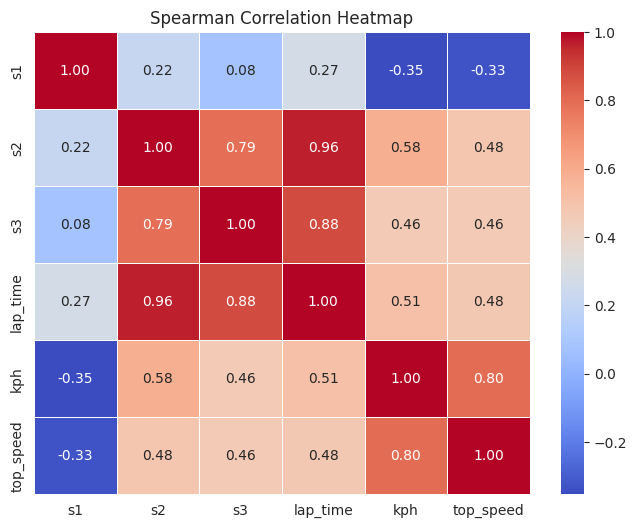

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix_spearman = df[['s1', 's2', 's3', 'lap_time','kph','top_speed']].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

### Machine Learning Models and their visualization

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['s1','s3', 'top_speed', 'kph']]
y = df['lap_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error:', mse)

r_squared = model.score(X_test, y_test)
print('R-squared:', r_squared)

Coefficients: [ 2.16122112  1.47606321 -0.10173152  0.24925104]
Intercept: -28.239806199083205
Mean Squared Error: 51.256288836217884
R-squared: 0.9841576036590596


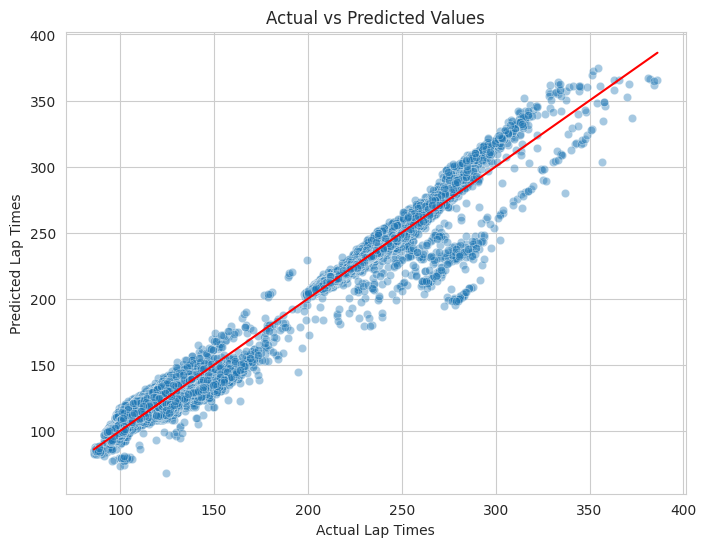

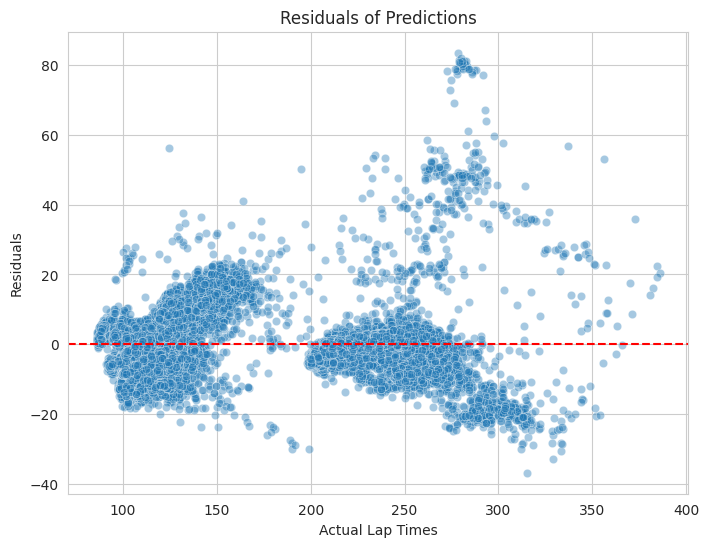

/tmp/ipykernel_1517434/3254218141.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_df.Coefficients, y=coef_df.index, palette='viridis')


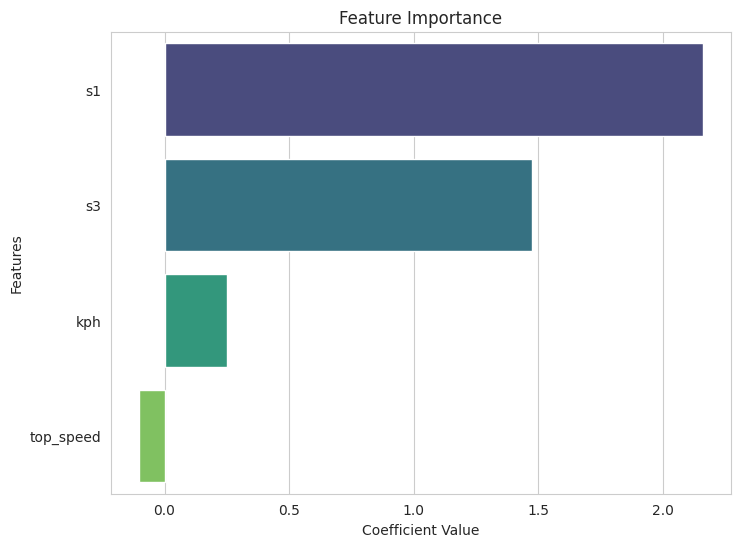

R-squared for the model: 0.98


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
sns.lineplot(x=y_test, y=y_test, color='red')  
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Lap Times')
plt.ylabel('Predicted Lap Times')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.4)
plt.axhline(y=0, color='red', linestyle='--')  
plt.title('Residuals of Predictions')
plt.xlabel('Actual Lap Times')
plt.ylabel('Residuals')
plt.show()


features = ['s1', 's3', 'top_speed', 'kph']
coef_df = pd.DataFrame(model.coef_, index=features, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=coef_df.Coefficients, y=coef_df.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()
print(f'R-squared for the model: {r_squared:.2f}')

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['s1','s3', 'top_speed', 'kph']]
y = df['lap_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 2  
polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())


polynomial_model.fit(X_train, y_train)

y_pred = polynomial_model.predict(X_test)
print('Polynomial Regression')
mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error:', mse)

r_squared = polynomial_model.score(X_test, y_test)
print('R-squared:', r_squared)

Polynomial Regression
Mean Squared Error: 37.656495603379376
R-squared: 0.9883610549709155


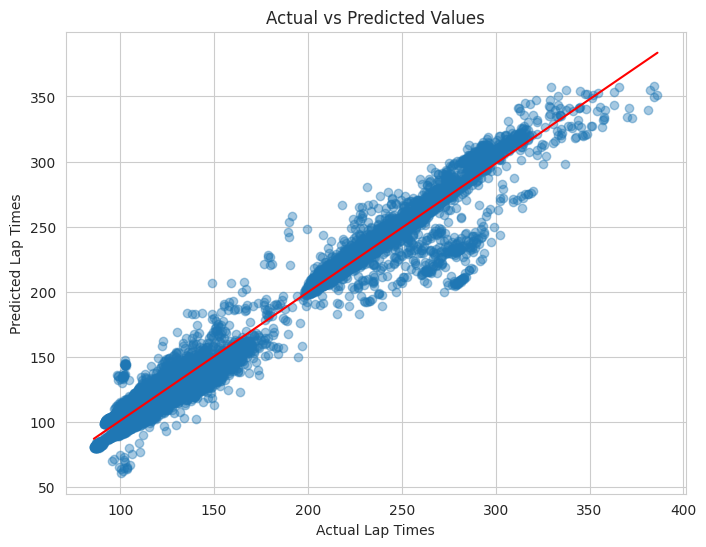

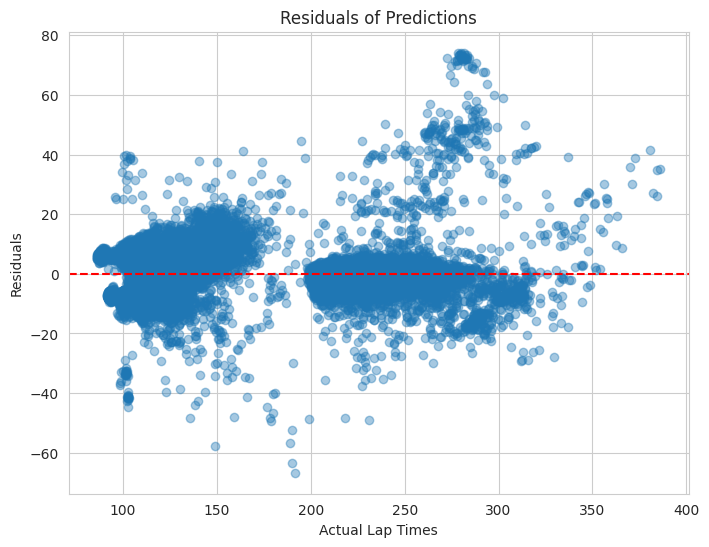

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)), color='red')  
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Lap Times')
plt.ylabel('Predicted Lap Times')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.4)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Actual Lap Times')
plt.ylabel('Residuals')
plt.show()

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gb_regressor.fit(X_train, y_train)

y_pred_gb = gb_regressor.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)

print('Gradient Boosting Machine')
print('Mean Squared Error:', mse_gb)
print('R-squared:', gb_regressor.score(X_test, y_test))

Gradient Boosting Machine
Mean Squared Error: 10.93336183725552
R-squared: 0.9966206946406482


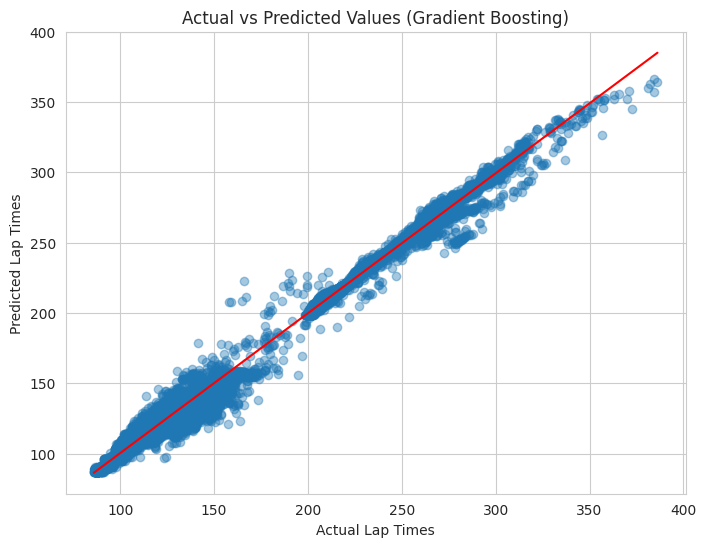

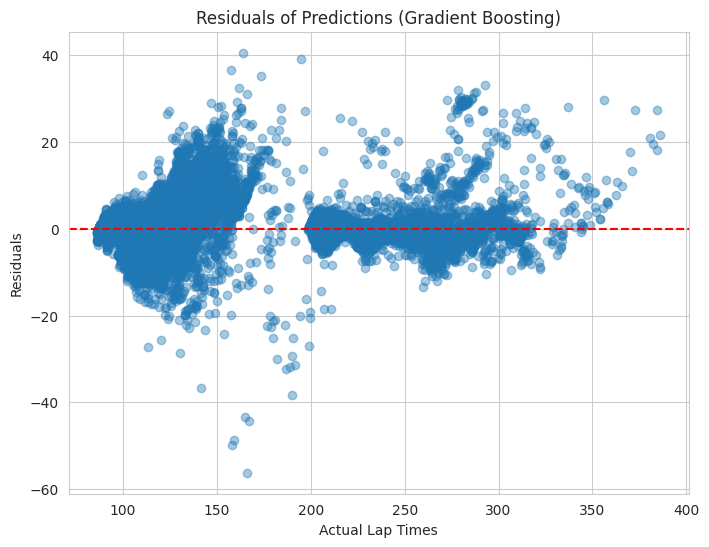

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.4)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred_gb, 1))(np.unique(y_test)), color='red')  
plt.title('Actual vs Predicted Values (Gradient Boosting)')
plt.xlabel('Actual Lap Times')
plt.ylabel('Predicted Lap Times')
plt.show()

residuals_gb = y_test - y_pred_gb
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_gb, alpha=0.4)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of Predictions (Gradient Boosting)')
plt.xlabel('Actual Lap Times')
plt.ylabel('Residuals')
plt.show()

In [42]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train = X_train.values
y_train = y_train.values
k = 5

kf = KFold(n_splits=k, shuffle=True, random_state=42)
model = DecisionTreeRegressor()
mse_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    model.fit(X_train_fold, y_train_fold)
    
    y_pred = model.predict(X_val_fold)
    mse = mean_squared_error(y_val_fold, y_pred)
   
    mse_scores.append(mse)
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print("Mean MSE:", mean_mse)
print("Standard Deviation of MSE:", std_mse)

Mean MSE: 3.205950578745882
Standard Deviation of MSE: 0.3093001488257213


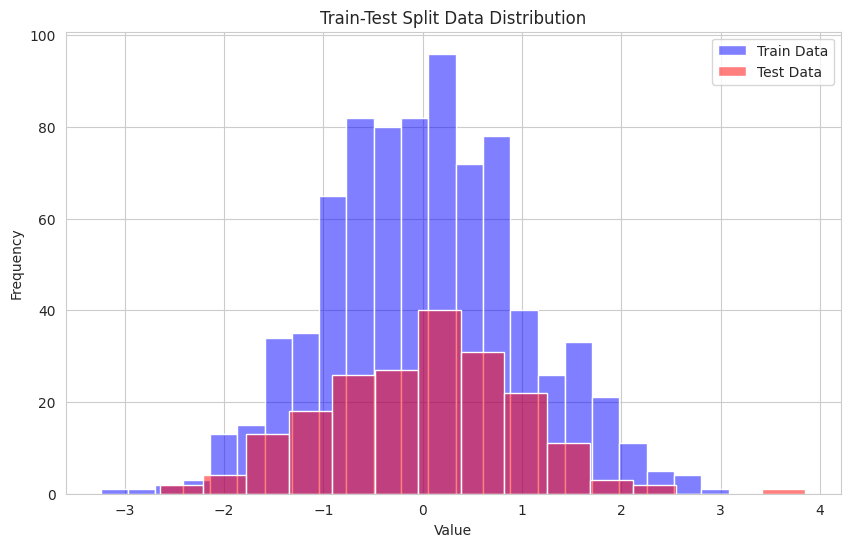

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=1000)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
sns.histplot(train_data, color='blue', alpha=0.5, label='Train Data')
sns.histplot(test_data, color='red', alpha=0.5, label='Test Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Train-Test Split Data Distribution')
plt.legend()
plt.show()
